# **Data Preprocessing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, preprocessing, model_selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split # Make sure this is imported

In [2]:
# Load example dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a dataframe (good for EDA)
df = pd.DataFrame(X, columns = feature_names)
df['target'] = y

print("Dataset Overview")
print(df.head())


Dataset Overview
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
# Basic Exploratory data analysis
print("\nDataset info:")
print(df.info())
print ("\nDescriptive Statistics:")
print(df.describe())
print("\nCheck for missing values (original df):")
print(df.isnull().sum())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%       

In [4]:
# Handling missing values (no missing values in iris, but demonstrating the technique)
# Creating dummy missing values for demonstration
df_with_missing = df.copy()
df_with_missing.iloc[0:5,0] = np.nan
print("\nDataFrame with intentionally added missing values:")
print(df_with_missing.head())
print(df_with_missing.isnull().sum())


DataFrame with intentionally added missing values:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                NaN               3.5                1.4               0.2   
1                NaN               3.0                1.4               0.2   
2                NaN               3.2                1.3               0.2   
3                NaN               3.1                1.5               0.2   
4                NaN               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
sepal length (cm)    5
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [5]:
X_missing = df_with_missing.drop('target', axis=1) # Features with missing values
y_target = df_with_missing['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_missing, y_target,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=y_target)

In [7]:
print(f"\nShape of X_train before imputation: {X_train.shape}")
print(f"Missing values in X_train:\n{X_train.isnull().sum()}")
print(f"\nShape of X_test before imputation: {X_test.shape}")
print(f"Missing values in X_test:\n{X_test.isnull().sum()}")


Shape of X_train before imputation: (105, 4)
Missing values in X_train:
sepal length (cm)    3
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Shape of X_test before imputation: (45, 4)
Missing values in X_test:
sepal length (cm)    2
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [8]:
# 2. Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# 3. Fit the imputer ONLY on the training data
imputer.fit(X_train) # Learn means from X_train

SimpleImputer()

In [9]:
# 4. Transform both training and test data using the fitted imputer
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

In [10]:
print(f"\nMissing values in X_train_imputed:\n{X_train_imputed.isnull().sum()}")
print(f"\nMissing values in X_test_imputed:\n{X_test_imputed.isnull().sum()}")
print("\nX_train_imputed head:")
print(X_train_imputed.head())
print("\nX_test_imputed head:")
print(X_test_imputed.head())


Missing values in X_train_imputed:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Missing values in X_test_imputed:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

X_train_imputed head:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
33                 5.5               4.2                1.4               0.2
20                 5.4               3.4                1.7               0.2
115                6.4               3.2                5.3               2.3
124                6.7               3.3                5.7               2.1
35                 5.0               3.2                1.2               0.2

X_test_imputed head:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
148                6.2               3.4                5.4               2.3
5                  5.4               3.9          

In [11]:
# Feature Scaling
# Standardization (mean =0, std = 1)
scaler = StandardScaler()
# fit only training data, transform both
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed),
                              columns=X_train_imputed.columns,
                              index=X_train_imputed.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed),
                             columns=X_test_imputed.columns,
                             index=X_test_imputed.index)
print("\nAfter standardization (X_train_scaled head):")
print(X_train_scaled.head())


After standardization (X_train_scaled head):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
33           -0.481396          2.631185          -1.332697         -1.307284
20           -0.605079          0.769184          -1.165380         -1.307284
115           0.631756          0.303684           0.842430          1.445879
124           1.002807          0.536434           1.065520          1.183673
35           -1.099813          0.303684          -1.444242         -1.307284


In [12]:
# Normalization (Min-Max scaling to [0,1])
min_max_scaler = MinMaxScaler()
# Fit ONLY on training data, transform both
X_train_normalized = pd.DataFrame(min_max_scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns, index=X_train_imputed.index)
X_test_normalized = pd.DataFrame(min_max_scaler.transform(X_test_imputed), columns=X_test_imputed.columns, index=X_test_imputed.index)
print("\nAfter normalization (X_train_normalized head):")
print(X_train_normalized.head())


After normalization (X_train_normalized head):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
33            0.333333          1.000000           0.067797          0.041667
20            0.305556          0.636364           0.118644          0.041667
115           0.583333          0.545455           0.728814          0.916667
124           0.666667          0.590909           0.796610          0.833333
35            0.194444          0.545455           0.033898          0.041667


In [13]:
# Encoding categorical variable (Using different example)
# Note: Iris dataset is all numerical, so we use other demo example
print("\n--- Categorical Data Handling Demo ---")
categorical_data = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue'],
    'size': ['small', 'medium', 'medium', 'large', 'large'],
    'target_cat': [0, 1, 0, 1, 0] # Example target for categorical data
})
print("Original categorical data example:")
print(categorical_data)



--- Categorical Data Handling Demo ---
Original categorical data example:
   color    size  target_cat
0    red   small           0
1   blue  medium           1
2  green  medium           0
3    red   large           1
4   blue   large           0


In [14]:
# Label encoding (for ordinal data - 'size' might be considered ordinal here)
# Apply fit_transform to the column
label_encoder = LabelEncoder()
categorical_data['size_encoded'] = label_encoder.fit_transform(categorical_data['size'])
print("\nAfter label encoding ('size_encoded'):")
print(categorical_data)


After label encoding ('size_encoded'):
   color    size  target_cat  size_encoded
0    red   small           0             2
1   blue  medium           1             1
2  green  medium           0             1
3    red   large           1             0
4   blue   large           0             0


In [15]:
# One-hot encoding (for nominal data - 'color')
# Use pd.get_dummies for simplicity in this demo
one_hot = pd.get_dummies(categorical_data['color'], prefix = 'color', dtype=int)
categorical_data = pd.concat([categorical_data, one_hot], axis=1)
print("\nAfter one-hot encoding ('color_red', 'color_blue', 'color_green'):")
print(categorical_data)
print("--- End Categorical Data Handling Demo ---\n")


After one-hot encoding ('color_red', 'color_blue', 'color_green'):
   color    size  target_cat  size_encoded  color_blue  color_green  color_red
0    red   small           0             2           0            0          1
1   blue  medium           1             1           1            0          0
2  green  medium           0             1           0            1          0
3    red   large           1             0           0            0          1
4   blue   large           0             0           1            0          0
--- End Categorical Data Handling Demo ---



In [16]:
# --- Using ColumnTransformer for mixed data types (Best Practice) ---
# Bring it all together for your actual ML pipeline.
# Define which columns should be encoded with which transformations
# For Iris, all are numeric, so we'll use StandardScaler for all

numeric_features = list(X_train_imputed.columns)  # All features are numeric for Iris
# If you had categorical features, you'd list them and define transformers for them too.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features) # Apply StandardScaler to all numeric_features
        # If you had categorical, you'd add:
        # ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns not specified (if any)
)


In [17]:
# Create and run a full pipeline
# This pipeline will first apply the preprocessor (imputation could be inside too!),
# then potentially feature selection, and finally a model.

# For this demo, we'll put the imputer *inside* the pipeline as well,
# which is the most robust way to prevent leakage.
# The imputer and scaler will automatically fit on X_train and transform X_train/X_test.

from sklearn.feature_selection import SelectKBest, f_classif

full_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='mean')), #Imputation step
    ('preprocessor', preprocessor), # Scaling step using column transformer
    ('selector', SelectKBest(f_classif, k=2)), #Feature selection step
    #('classifier', LoisticRegression(C=100.0, solver = 'lbfgs', random_state=1)) #your model
])

# Set the output of the pipeline to be pandas DataFrames
# This requires scikit-learn version 1.2 or later
full_pipeline = full_pipeline.set_output(transform="pandas")

# Fit the pipeline on the original X_train (before manual imputation/scaling)
# The pipeline will handle the imputation, scaling, and feature selection internally.
X_train_processed_pipeline = full_pipeline.fit_transform(X_train, y_train)

#Trasform the test set using the fitted pipeline
X_test_preprocessed_pipeline = full_pipeline.transform(X_test)

print("\nAfter full preprocessing pipeline (X_train_processed_pipeline head):")
# Since the output is now a DataFrame (due to set_output), use .head()
print(X_train_processed_pipeline.head())
print(f"Shape after pipeline: {X_train_processed_pipeline.shape}")


After full preprocessing pipeline (X_train_processed_pipeline head):
     num__petal length (cm)  num__petal width (cm)
33                -1.332697              -1.307284
20                -1.165380              -1.307284
115                0.842430               1.445879
124                1.065520               1.183673
35                -1.444242              -1.307284
Shape after pipeline: (105, 2)


In [18]:
# To see which features were selected by SelectKBest within the pipeline:
# You need to access the 'selector' step within the fitted pipeline
# Note: get_support() needs the feature names before the selector step.
# For simplicity here, we'll use a separate selector instance for demonstration.
# In a real scenario, you'd need a way to pass original feature names through the pipeline steps.

# --- Feature Selection (Demonstration outside the main pipeline for clarity of selected names) ---
# If SelectKBest is the last step in your pipeline, accessing the selected features can be tricky
# because it operates on the transformed (and potentially unnamed) data.
# Let's show it on the already scaled/imputed data or as a standalone step after processing.

# Using a new selector for demonstration to get feature names easily
selector_demo = SelectKBest(f_classif, k=2)
# Apply to the imputed and scaled training data
selector_demo.fit(X_train_scaled, y_train) # Use X_train_scaled or X_train_imputed for fitting
selected_mask = selector_demo.get_support()
selected_features = np.array(feature_names)[selected_mask] # Access original feature names via mask
print("\nTop selected features by SelectKBest (demonstration):")
print(selected_features)
print("X_train_scaled with selected features (head):")
print(X_train_scaled.iloc[:, selected_mask].head())


Top selected features by SelectKBest (demonstration):
['petal length (cm)' 'petal width (cm)']
X_train_scaled with selected features (head):
     petal length (cm)  petal width (cm)
33           -1.332697         -1.307284
20           -1.165380         -1.307284
115           0.842430          1.445879
124           1.065520          1.183673
35           -1.444242         -1.307284


# **Supervised Learning Algorithms**

# **Linear Regression**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Model coefficients:[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Model intercept:151.34560453985995
Mean Squared Error: 2900.193628493482
R-Squared (R2) score:0.45


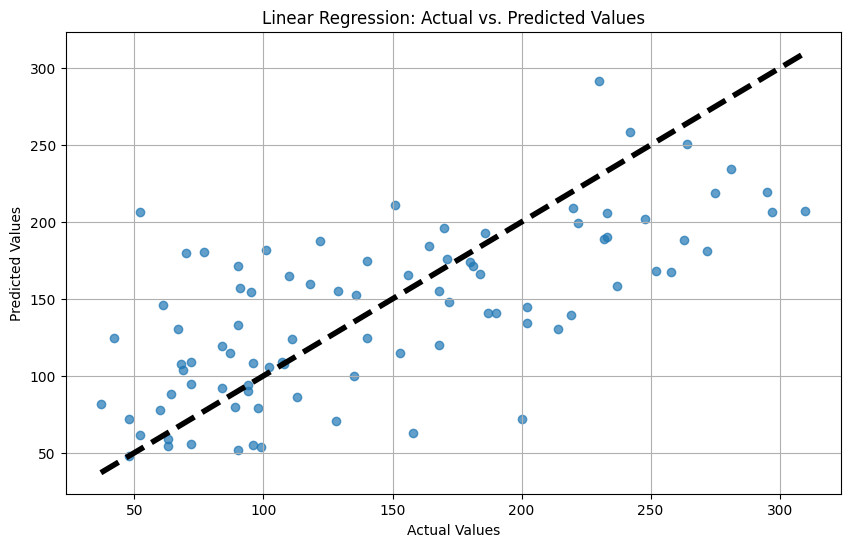

In [20]:
# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model coefficients:{model.coef_}")
print(f"Model intercept:{model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-Squared (R2) score:{r2:.2f}")

# Plot predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.grid(True)
plt.show()

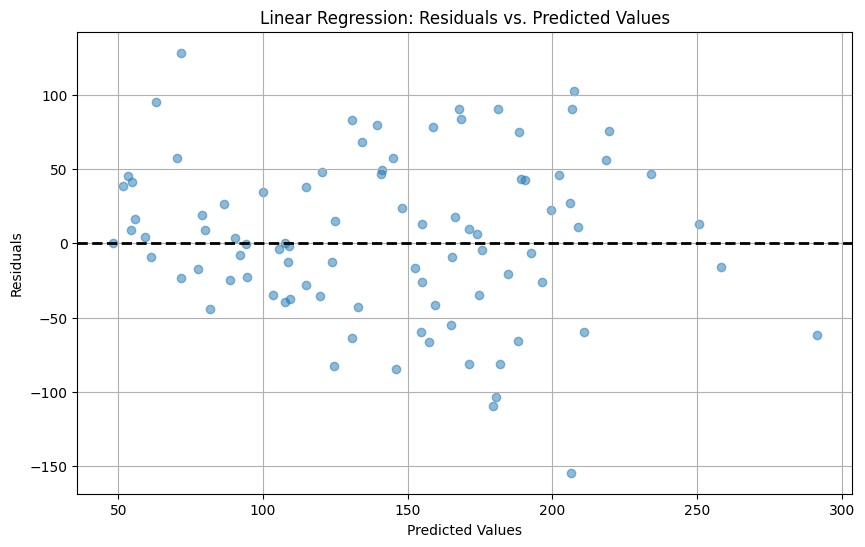

In [22]:
# Plot Residuals
residulas = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residulas, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs. Predicted Values')
plt.grid(True)
plt.show()


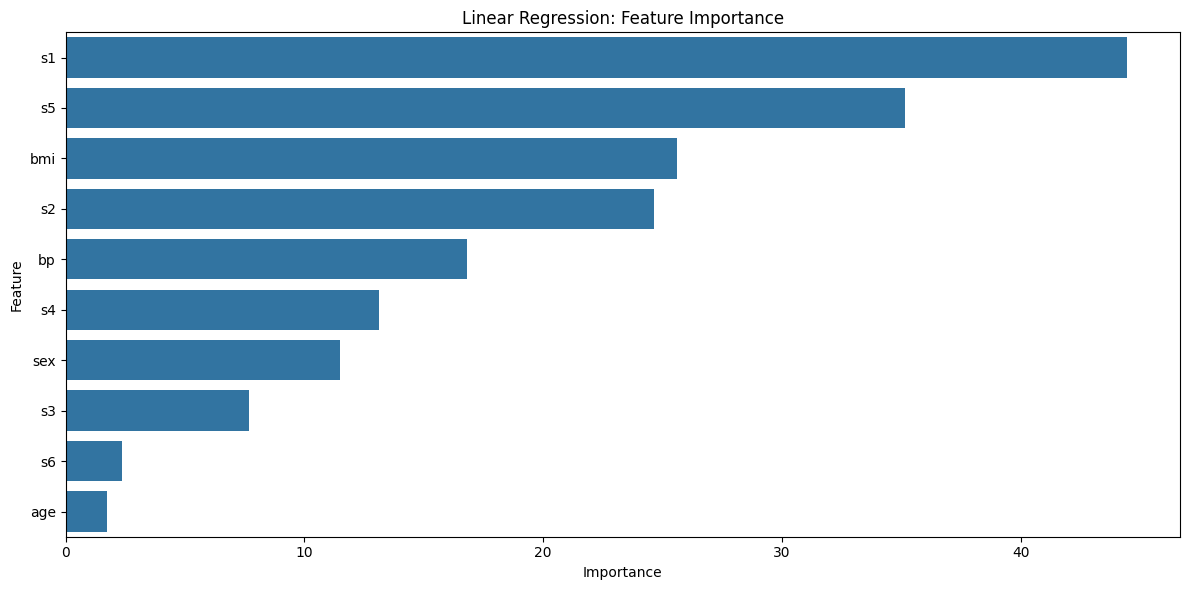

In [23]:
# Feature Importance

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Feature importance based on absolute cofeeicient values
importance = np.abs(model_scaled.coef_)
feature_names = diabetes.feature_names

# Plot the feature importance
plt.figure(figsize=(12,6))
feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title('Linear Regression: Feature Importance')
plt.tight_layout()
plt.show()

# **Logistic Regression**

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score,
                             roc_curve, precision_recall_curve, average_precision_score) # Added roc_curve, average_precision_score

# --- Load breast cancer dataset ---
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target # 0 for benign, 1 for malignant
feature_names = cancer.feature_names
target_names = cancer.target_names # ['malignant' 'benign'] -> Oops! 'benign' is 0, 'malignant' is 1

# Verify target names and their corresponding values
print(f"Target Names (0: {cancer.target_names[0]}, 1: {cancer.target_names[1]}): {cancer.target_names}")
# In sklearn's breast cancer dataset, 0 is malignant, 1 is benign by default.
# It's common to reverse this so 1 is the 'positive' (malignant) case.
# Let's check the distribution of the target
print(f"Original target distribution: {np.bincount(y)}")

# --- Important: Re-map target to make 'malignant' (cancer) the positive class (1) ---
# If 0 is malignant and 1 is benign, it's often more intuitive to have 1 as the "positive" outcome.
# Let's assume you want 'malignant' as class 1 and 'benign' as class 0.
# The default load_breast_cancer has 0: malignant, 1: benign. This is counter-intuitive for ROC curves.
# Let's reverse the labels for clarity in interpretation, so 1 is malignant.
# If original y: 0=malignant, 1=benign
# New y: 0=benign, 1=malignant
y_redefined = np.where(y == 0, 1, 0) # If y is 0 (malignant), make it 1. If y is 1 (benign), make it 0.
# Update target names for clarity
target_names_redefined = ['benign', 'malignant']

print(f"Redefined target distribution (0: {target_names_redefined[0]}, 1: {target_names_redefined[1]}): {np.bincount(y_redefined)}")


# --- Data Splitting ---
# Use the redefined target (y_redefined) for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y_redefined,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y_redefined) # Stratify based on the redefined target


Target Names (0: malignant, 1: benign): ['malignant' 'benign']
Original target distribution: [212 357]
Redefined target distribution (0: benign, 1: malignant): [357 212]


In [36]:
# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Initialize and train the logistic regression model ---
# No need for multi_class='ovr' for binary. Default 'auto' or 'ovr' works.
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# --- Make predictions ---
y_pred = model.predict(X_test_scaled)
# Probability of the positive class (class 1, which is now 'malignant')
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [37]:
# --- Model Evaluation ---
accuracy = accuracy_score(y_test, y_pred)
# For binary classification, 'pos_label=1' ensures metrics are calculated for the positive class.
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

conf_matrix = confusion_matrix(y_test, y_pred)
# Use target_names_redefined for clearer report
class_report = classification_report(y_test, y_pred, target_names=target_names_redefined)

roc_auc = roc_auc_score(y_test, y_prob) # Correct for binary

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Malignant): {precision:.4f}")
print(f"Recall (Malignant): {recall:.4f}")
print(f"F1 Score (Malignant): {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}") # This will likely be very high (e.g., >0.98)

print("\nConfusion Matrix:")
# Better display of confusion matrix for clarity
cm_df = pd.DataFrame(conf_matrix,
                     index=[f'Actual {target_names_redefined[0]}', f'Actual {target_names_redefined[1]}'],
                     columns=[f'Pred {target_names_redefined[0]}', f'Pred {target_names_redefined[1]}'])
print(cm_df)

print("\nClassification Report:")
print(class_report)

Accuracy: 0.9650
Precision (Malignant): 0.9800
Recall (Malignant): 0.9245
F1 Score (Malignant): 0.9515
ROC AUC Score: 0.9962

Confusion Matrix:
                  Pred benign  Pred malignant
Actual benign              89               1
Actual malignant            4              49

Classification Report:
              precision    recall  f1-score   support

      benign       0.96      0.99      0.97        90
   malignant       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



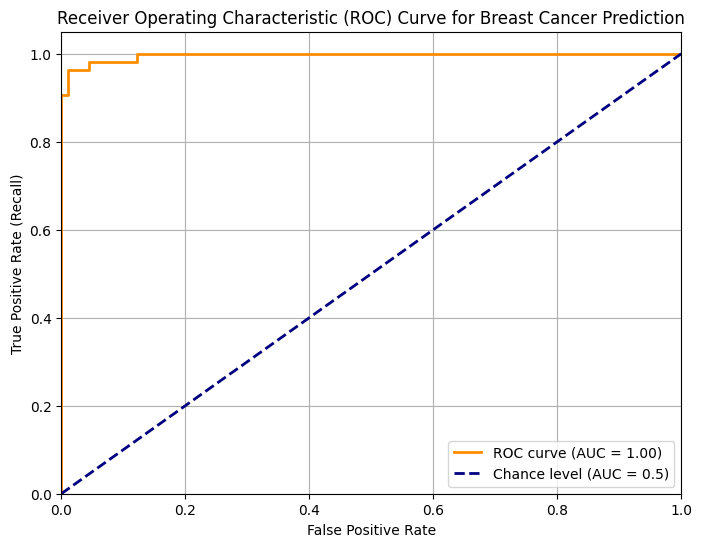

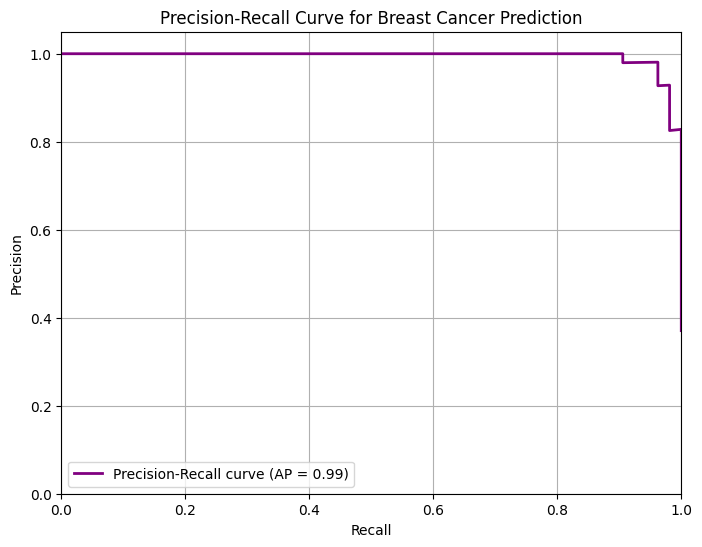

In [38]:
# --- Plot ROC curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1) # Specify positive label for clarity

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance level (AUC = 0.5)') # Add chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Breast Cancer Prediction')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Plot Precision-Recall Curve ---
precision_curve, recall_curve, thresholds_pr = precision_recall_curve(y_test, y_prob, pos_label=1)
average_precision = average_precision_score(y_test, y_prob) # Use average_precision_score for PR curve AUC

plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='purple', lw=2,
         label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Breast Cancer Prediction')
plt.grid(True)
plt.legend(loc="lower left") # Often lower left for PR curves
plt.show()


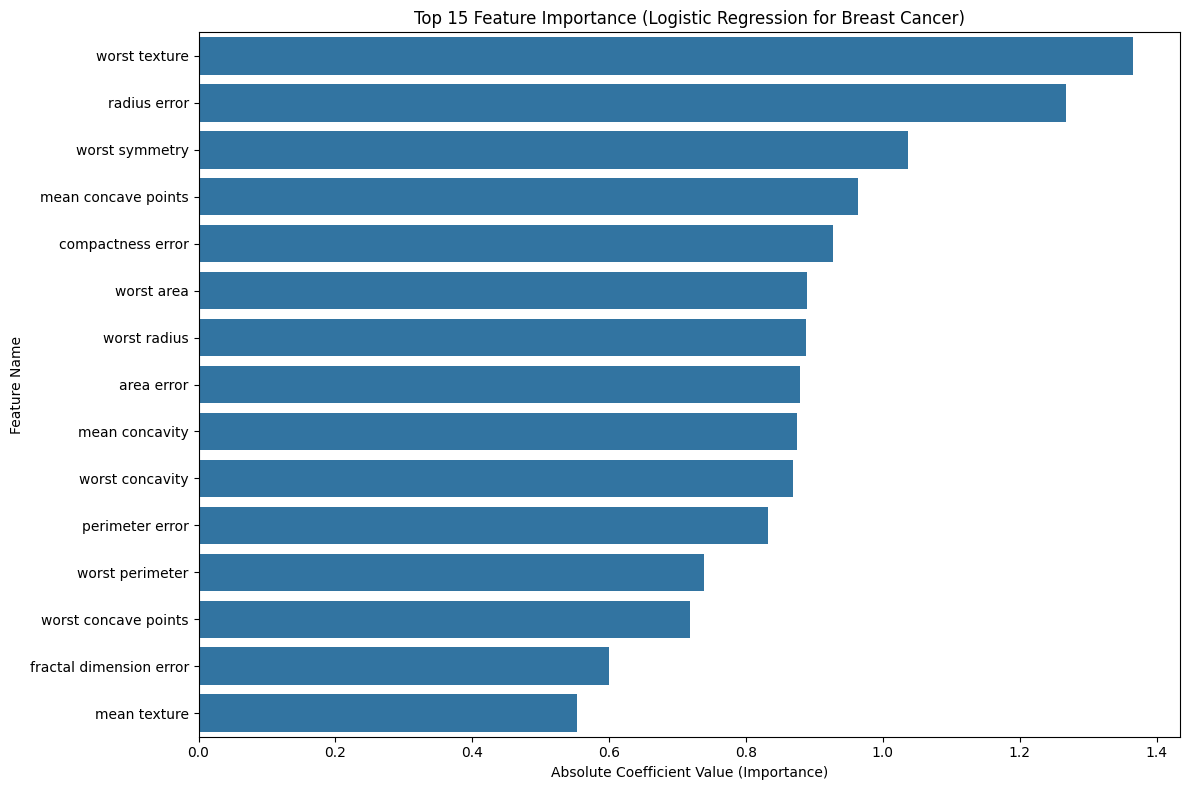

In [39]:
# Feature importance for logistic regression
# For binary classification, model.coef_ will have shape (1, n_features)
# We access the first (and only) row of coefficients.
importance = np.abs(model.coef_[0]) # Take the absolute value for magnitude

# `cancer.feature_names` holds the actual names
feature_names = cancer.feature_names

# Plot feature importance
plt.figure(figsize=(12, 8))

# Create a DataFrame for easier sorting and plotting with Seaborn
feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort by importance in descending order
feat_importance = feat_importance.sort_values('Importance', ascending=False)

# Plot the top 15 features. The Breast Cancer dataset has 30 features,
# so showing the top 15 is a reasonable subset.
# Using sns.barplot to visualize the importance.
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(15))

plt.title('Top 15 Feature Importance (Logistic Regression for Breast Cancer)')
plt.xlabel('Absolute Coefficient Value (Importance)') # More descriptive label
plt.ylabel('Feature Name')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# **Decision Trees**

## **Decision Tree for Classification**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             mean_squared_error, r2_score)

# --- Section 1: Decision Tree for Classification (Iris Dataset) ---

print("--- Decision Tree for Classification (Iris Dataset) ---")

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

--- Decision Tree for Classification (Iris Dataset) ---


In [43]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [44]:
# Create and train the decision tree model (unpruned)
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make prediction
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names = target_names)

print(f"Accuracy (Unpruned Tree): {accuracy:.4f}")
print("\nConfusion Matrix (Unpruned Tree):")
print(conf_matrix)
print("\nClassification Report (Unpruned Tree):")
print(class_report)

Accuracy (Unpruned Tree): 0.9333

Confusion Matrix (Unpruned Tree):
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]

Classification Report (Unpruned Tree):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



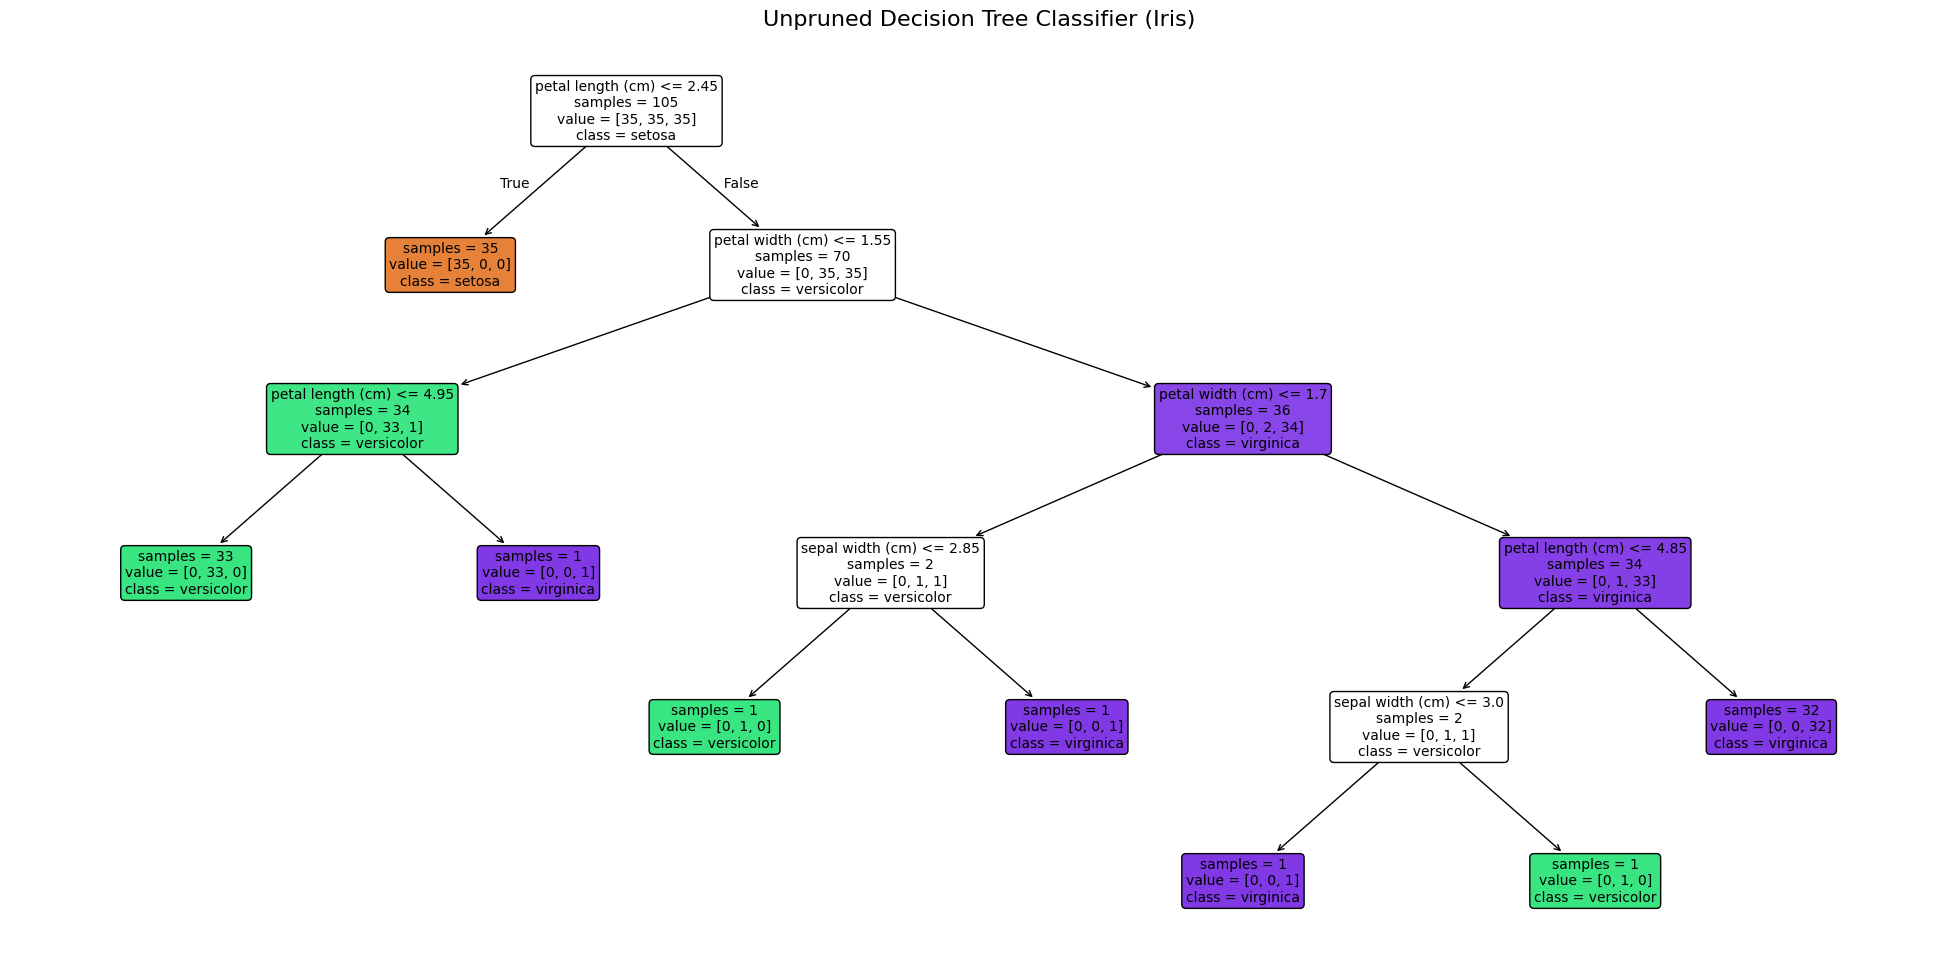

In [45]:
# Visualize the decision tree (unpruned)
plt.figure(figsize=(25, 12)) # Increased figure size for better visibility
plot_tree(dt_classifier, feature_names=feature_names, class_names=target_names,
          filled=True, rounded=True, fontsize=10, impurity=False) # impurity=False can make it cleaner
plt.title("Unpruned Decision Tree Classifier (Iris)", fontsize=16)
plt.show()

In [46]:
# Feature importance (for unpruned tree)
importance = dt_classifier.feature_importances_

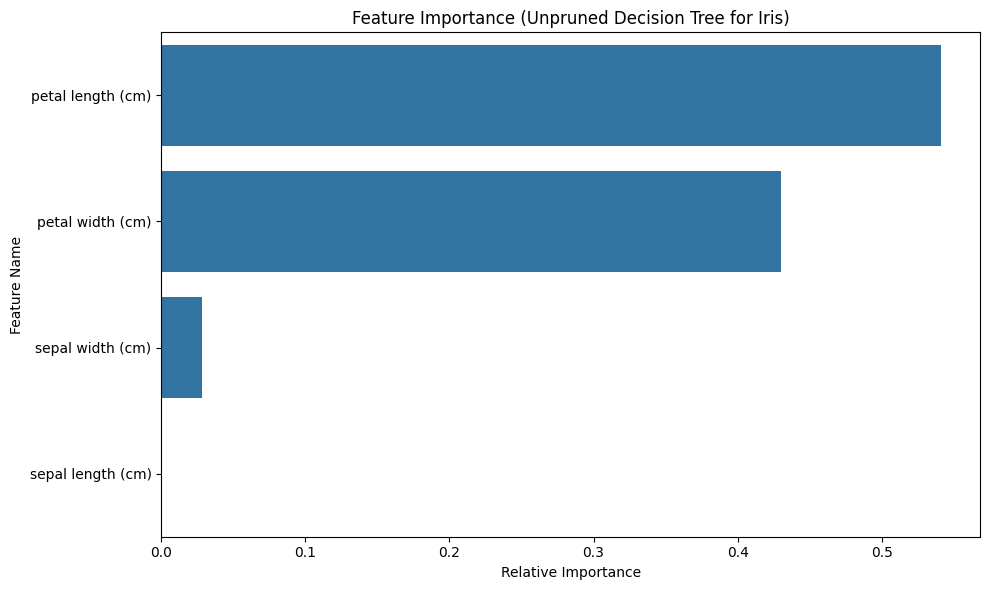

In [47]:
# Plot feature importance
plt.figure(figsize=(10, 6))
feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title('Feature Importance (Unpruned Decision Tree for Iris)')
plt.xlabel('Relative Importance') # More descriptive label
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [49]:
# Pruning the decision tree to prevent overfitting
print("\n--- Pruning the Decision Tree (Iris Dataset) ---")
# max_depth: Limits the depth of the tree
# min_samples_split: Minimum number of samples required to split an internal node
# min_samples_leaf: Minimum number of samples required to be at a leaf node
dt_pruned = DecisionTreeClassifier(max_depth = 3, min_samples_split=5, random_state=42)
dt_pruned.fit(X_train, y_train)

# Evaluate pruned model
y_pred_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)

print(f"Pruned Decision Tree Accuracy: {accuracy_pruned:.4f}")
print("\nConfusion Matrix (Pruned Tree):")
print(confusion_matrix(y_test, y_pred_pruned))
print("\nClassification Report (Pruned Tree):")
print(classification_report(y_test, y_pred_pruned, target_names=target_names))


--- Pruning the Decision Tree (Iris Dataset) ---
Pruned Decision Tree Accuracy: 0.9778

Confusion Matrix (Pruned Tree):
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]

Classification Report (Pruned Tree):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



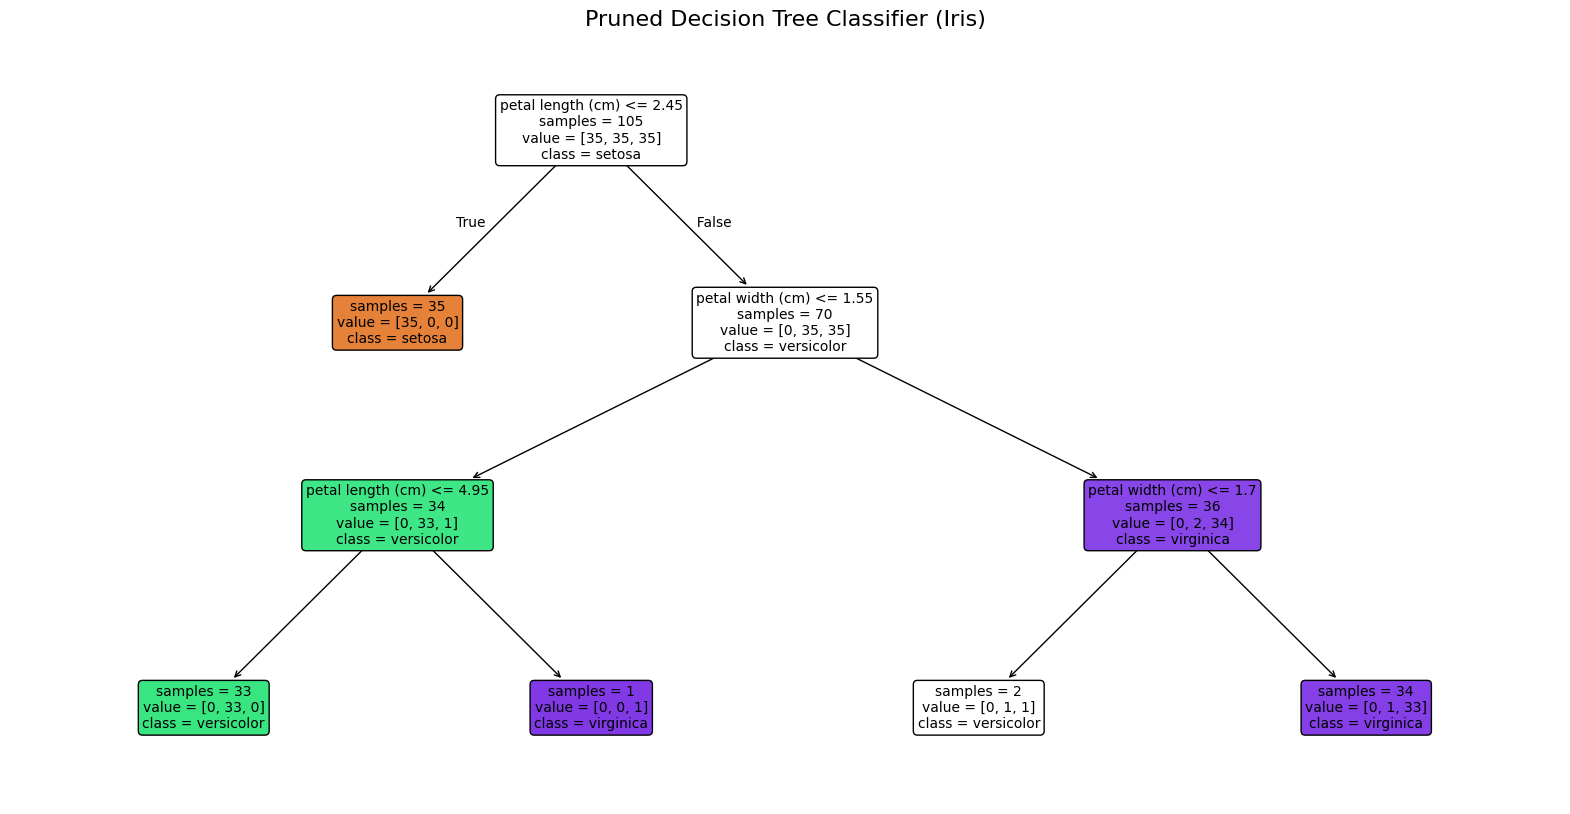

In [50]:
# Visualize the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_pruned, feature_names=feature_names, class_names=target_names,
          filled=True, rounded=True, fontsize=10, impurity=False) # impurity=False
plt.title("Pruned Decision Tree Classifier (Iris)", fontsize=16)
plt.show()

## **Decision Tree for Regression**

In [51]:
# --- Section 2: Decision Tree for Regression (Diabetes Dataset) ---

print("\n--- Decision Tree for Regression (Diabetes Dataset) ---")

# Load diabetes dataset
diabetes = load_diabetes()
X_reg = diabetes.data
y_reg = diabetes.target
feature_names_reg = diabetes.feature_names # Get feature names for regression



--- Decision Tree for Regression (Diabetes Dataset) ---


In [52]:
# Split the data
# Corrected missing '2' in random_state
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
# Common practice to use random_state for reproducibility


In [53]:
# Create and train the decision tree regression model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(random_state=42)

In [54]:
# Make predictions
y_pred_reg = dt_regressor.predict(X_test_reg)

# Evaluate the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 4976.80
R² Score: 0.06


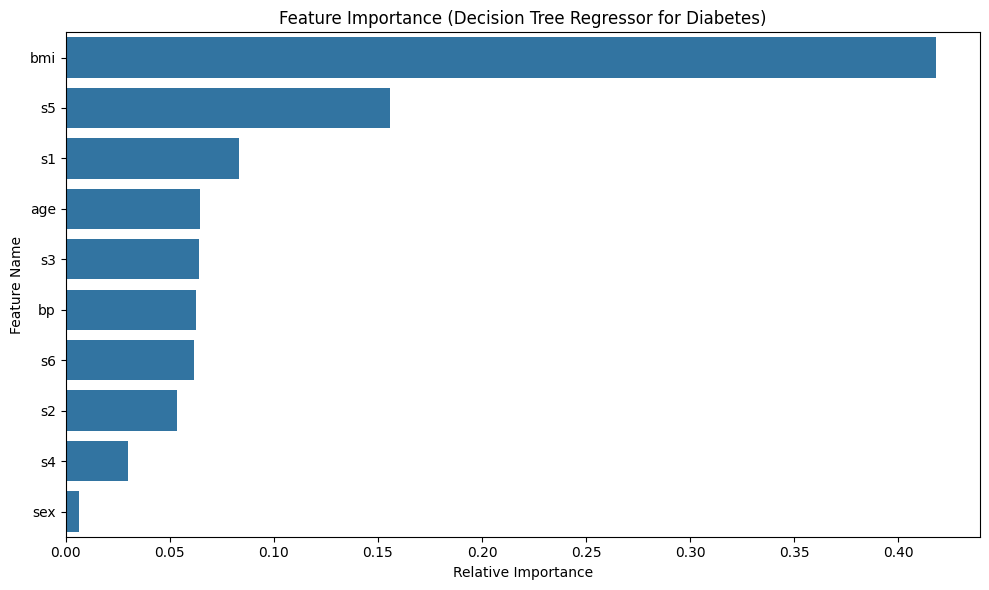

In [55]:
# Feature importance for regression
importance_reg = dt_regressor.feature_importances_

# Plot feature importance for regression
plt.figure(figsize=(10, 6))
feat_importance_reg = pd.DataFrame({'Feature': feature_names_reg, 'Importance': importance_reg})
feat_importance_reg = feat_importance_reg.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feat_importance_reg)
plt.title('Feature Importance (Decision Tree Regressor for Diabetes)')
plt.xlabel('Relative Importance') # Consistent label
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

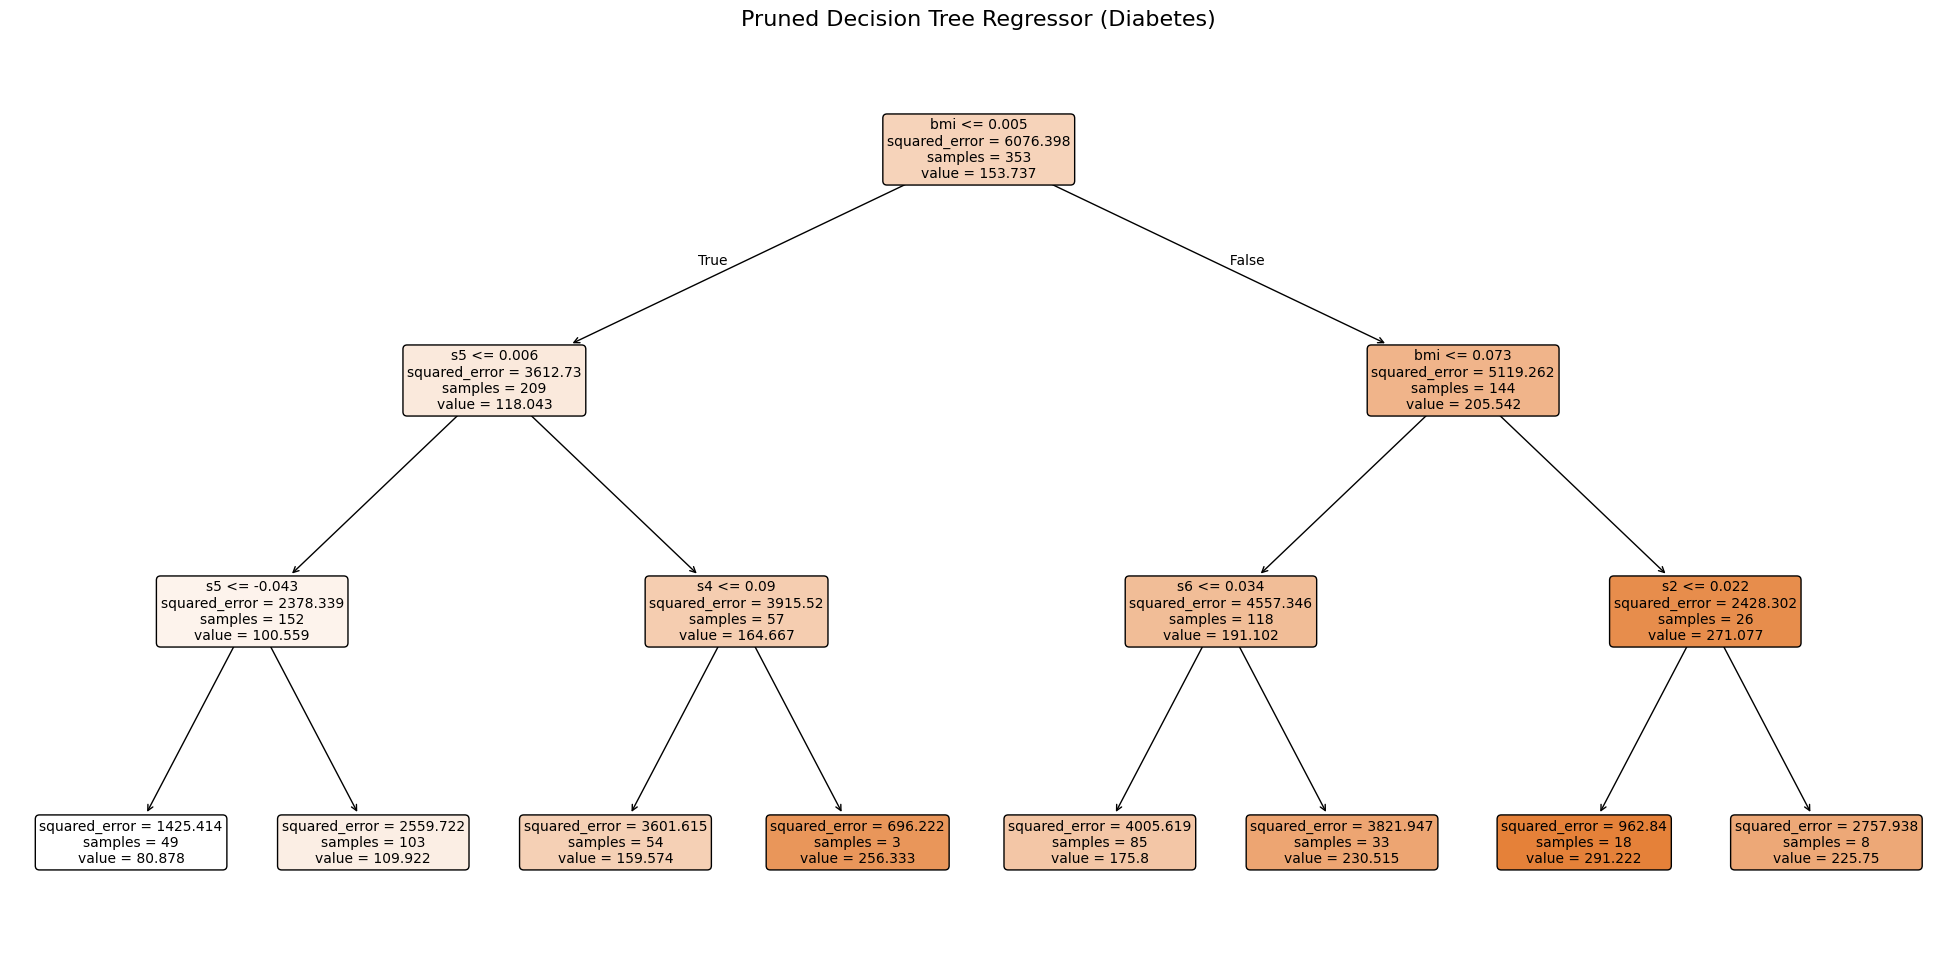

In [56]:
# --- Optional: Visualize Regression Tree (can be very large, careful with depth) ---
# It's usually not practical to visualize a deep regression tree due to complexity.
# But for a very shallow one, it can be illustrative.
dt_regressor_pruned_viz = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_regressor_pruned_viz.fit(X_train_reg, y_train_reg)
plt.figure(figsize=(25, 12))
plot_tree(dt_regressor_pruned_viz, feature_names=feature_names_reg, filled=True, rounded=True, fontsize=10)
plt.title("Pruned Decision Tree Regressor (Diabetes)", fontsize=16)
plt.show()

## **Random Forest**

## **Random Forest for Classification**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    mean_squared_error, r2_score # Import regression metrics
)

In [57]:
# --- Section 1: Random Forest for Classification (Breast Cancer Dataset) ---

print("--- Random Forest for Classification (Breast Cancer Dataset) ---")

# Load breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names

--- Random Forest for Classification (Breast Cancer Dataset) ---


In [63]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [64]:
# Important: Re-map target to make 'malignant' (cancer) the positive class (1)
# The default load_breast_cancer has 0: malignant, 1: benign.
# Let's reverse the labels for clarity in interpretation (1 is malignant).
# If original y: 0=malignant, 1=benign
# New y: 0=benign, 1=malignant
y_redefined = np.where(y == 0, 1, 0)
target_names_redefined = ['benign', 'malignant'] # Update names to match new y



In [65]:
y_redefined

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [66]:
print(f"Original target distribution (0: malignant, 1: benign): {np.bincount(y)}")
print(f"Redefined target distribution (0: benign, 1: malignant): {np.bincount(y_redefined)}")



Original target distribution (0: malignant, 1: benign): [212 357]
Redefined target distribution (0: benign, 1: malignant): [357 212]


In [67]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_redefined, # Use redefined target
    test_size=0.2,
    random_state=42, # Ensure random_state is 42
    stratify=y_redefined # Stratify based on the redefined target
)

In [68]:
# Create and train random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Make predictions
y_pred = rf_classifier.predict(X_test)
y_prob = rf_classifier.predict_proba(X_test)[:, 1] # Probability of the positive class (1, malignant)


In [71]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1) # Specify pos_label for clarity
recall = recall_score(y_test, y_pred, pos_label=1)       # Specify pos_label for clarity
f1 = f1_score(y_test, y_pred, pos_label=1)               # Specify pos_label for clarity
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names_redefined) # Use redefined names
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\nRandom Forest Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Malignant): {precision:.4f}")
print(f"Recall (Malignant): {recall:.4f}")
print(f"F1 Score (Malignant): {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")



Random Forest Classifier Results:
Accuracy: 0.9737
Precision (Malignant): 1.0000
Recall (Malignant): 0.9286
F1 Score (Malignant): 0.9630
ROC AUC Score: 0.9929


In [74]:
print("\nConfusion Matrix:")
cm_df = pd.DataFrame(conf_matrix,
                     index = [f'Actual {target_names_redefined[0]}', f'Actual {target_names_redefined[1]}'],
                     columns = [f'Pred {target_names_redefined[0]}', f'Pred {target_names_redefined[1]}'])
print(cm_df)


Confusion Matrix:
                  Pred benign  Pred malignant
Actual benign              72               0
Actual malignant            3              39


In [75]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

      benign       0.96      1.00      0.98        72
   malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



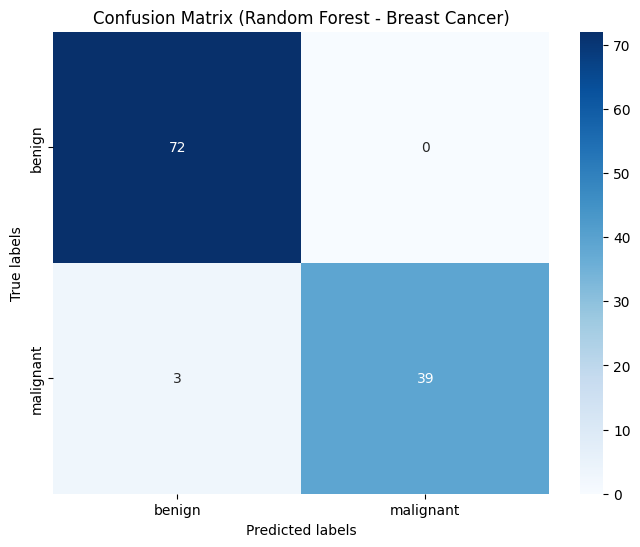

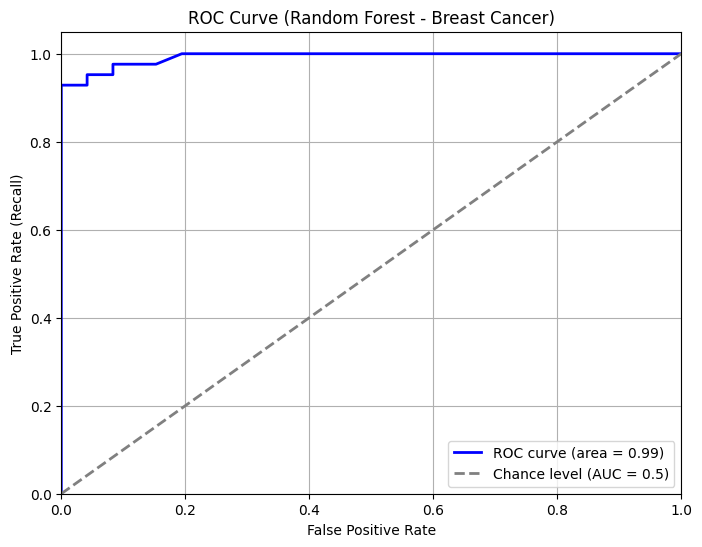

In [76]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_redefined, yticklabels=target_names_redefined) # Add labels to heatmap
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Random Forest - Breast Cancer)')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob) # No need for pos_label here, it's implicit for binary
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Chance level (AUC = 0.5)') # Label chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)') # More descriptive label
plt.title('ROC Curve (Random Forest - Breast Cancer)')
plt.legend(loc="lower right")
plt.grid(True) # Add grid for better readability
plt.show()

In [77]:
# Feature importance (Random Forest)
importances = rf_classifier.feature_importances_

# Sort feature importances
indices = np.argsort(importances)[::-1] # Sort in descending order

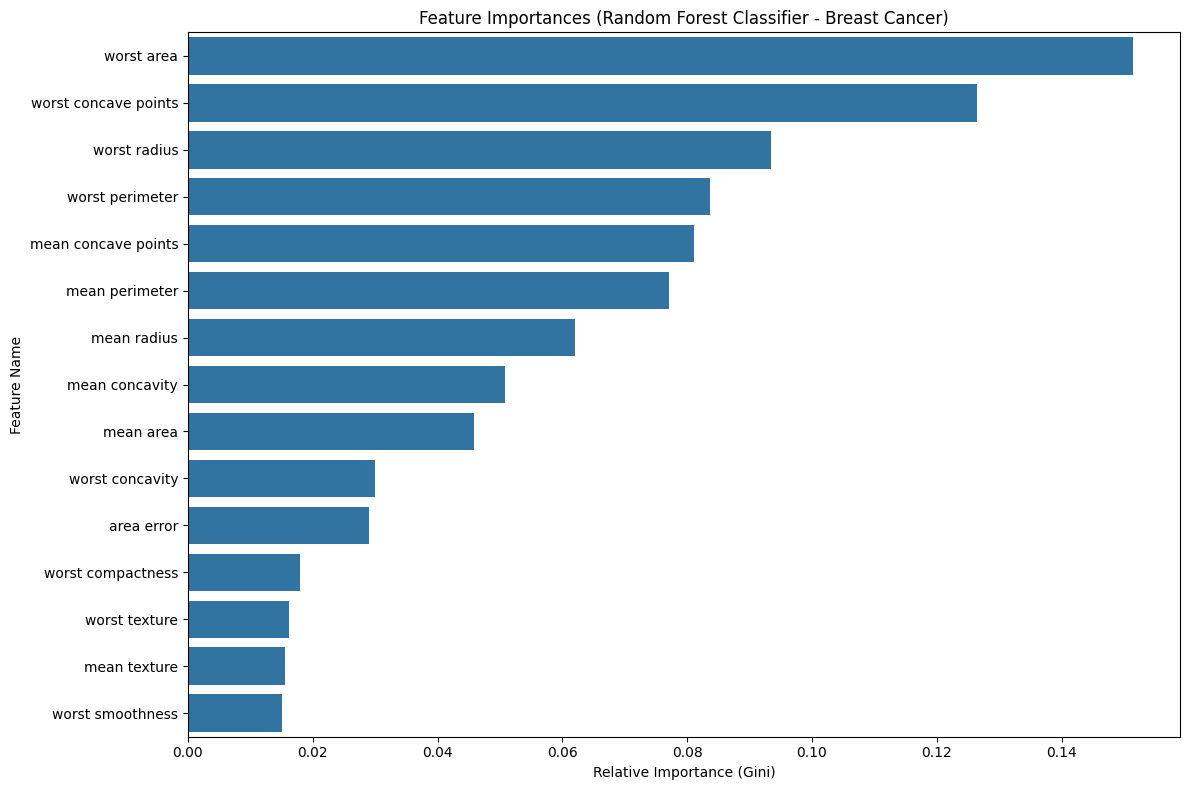

In [78]:
# Plot feature importances
plt.figure(figsize=(12, 8)) # Increased figure size for readability
plt.title("Feature Importances (Random Forest Classifier - Breast Cancer)")
# Use seaborn for bar plot with ordered features
feat_importance_df = pd.DataFrame({'Feature': feature_names[indices], 'Importance': importances[indices]})
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(15)) # Show top 15 features
plt.xlabel('Relative Importance (Gini)') # Specify type of importance
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


## **Random Forest for Regression**

In [79]:
# --- Section 2: Random Forest for Regression (Diabetes Dataset) ---

print("\n--- Random Forest for Regression (Diabetes Dataset) ---")

# Load diabetes dataset
diabetes = load_diabetes()
X_reg = diabetes.data
y_reg = diabetes.target
feature_names_reg = diabetes.feature_names

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42 # Ensure random_state is 42
)


--- Random Forest for Regression (Diabetes Dataset) ---


In [80]:
# Create and train random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [81]:
# Make predictions
y_pred_reg = rf_regressor.predict(X_test_reg)

# Evaluate the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nRandom Forest Regressor Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Random Forest Regressor Results:
Mean Squared Error: 2952.01
R² Score: 0.44


In [82]:
# Feature importance for regression
importances_reg = rf_regressor.feature_importances_
# feature_names_reg is already loaded above

# Sort feature importances for regression
indices_reg = np.argsort(importances_reg)[::-1] # Sort in descending order

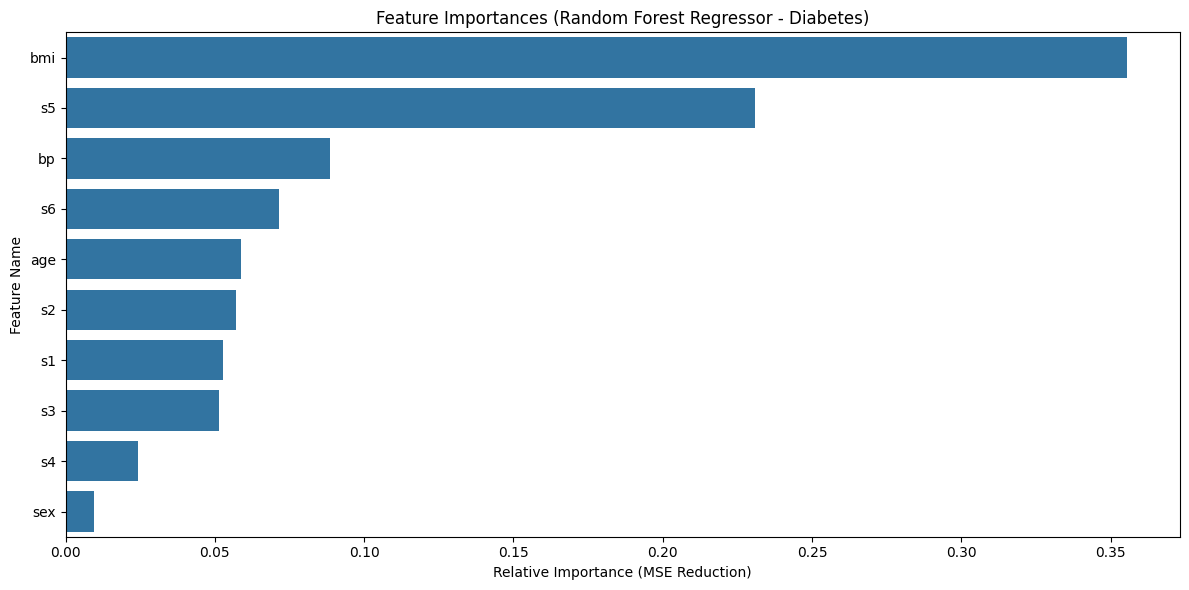

In [84]:
# Plot feature importances for regression
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest Regressor - Diabetes)")

# Convert feature_names_reg list to a numpy array to allow array indexing
feature_names_reg_array = np.array(feature_names_reg)

# Use seaborn for bar plot with ordered features
# Now, use the numpy array for indexing feature names
feat_importance_reg_df = pd.DataFrame({
    'Feature': feature_names_reg_array[indices_reg],  # Use the numpy array here
    'Importance': importances_reg[indices_reg]
})

sns.barplot(x='Importance', y='Feature', data=feat_importance_reg_df) # No head() unless you want top N
plt.xlabel('Relative Importance (MSE Reduction)') # Specify type of importance
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

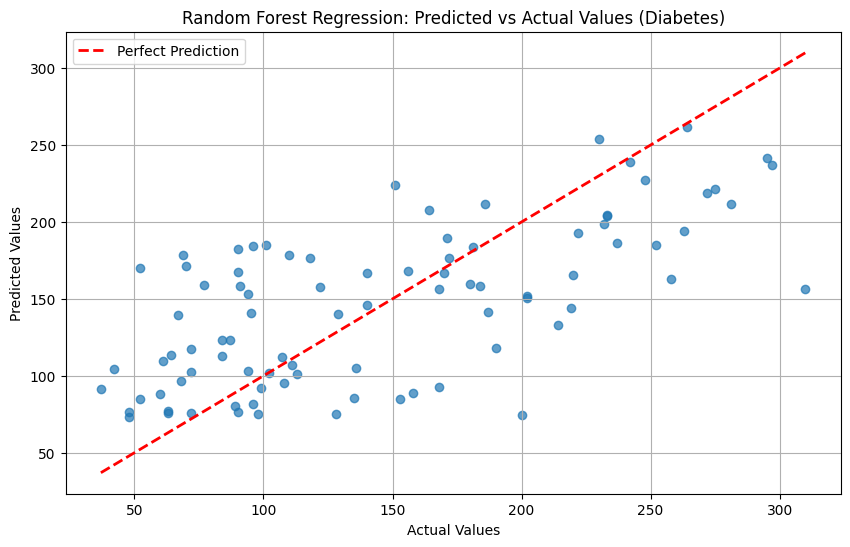

In [85]:
# Compare actual vs predicted values (Regression Plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7)
# Plot a diagonal line where actual == predicted
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Predicted vs Actual Values (Diabetes)')
plt.grid(True)
plt.legend() # Show legend for the perfect prediction line
plt.show()

## How to Implement Threshold Adjustment

In [86]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import numpy as np

# Assume y_test and y_prob (probabilities for the positive class) are available from your model
# y_test = actual labels, y_prob = predicted probabilities

# Original prediction with default 0.5 threshold
y_pred_default = (y_prob >= 0.5).astype(int)
print(f"Default (0.5 threshold):")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_default):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_default):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_default):.4f}")

# Scenario 1: Want higher Recall (lower False Negatives)
# Try a lower threshold, e.g., 0.3
threshold_recall_tuned = 0.3
y_pred_high_recall = (y_prob >= threshold_recall_tuned).astype(int)
print(f"\nHigh Recall (0.3 threshold):")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_high_recall):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_high_recall):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_high_recall):.4f}")

# Scenario 2: Want higher Precision (lower False Positives)
# Try a higher threshold, e.g., 0.7
threshold_precision_tuned = 0.7
y_pred_high_precision = (y_prob >= threshold_precision_tuned).astype(int)
print(f"\nHigh Precision (0.7 threshold):")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_high_precision):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_high_precision):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_high_precision):.4f}")

# You can also use the precision_recall_curve to find optimal thresholds for F1-score or specific precision/recall trade-offs.
from sklearn.metrics import precision_recall_curve, f1_score

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Find the threshold that maximizes F1-score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10) # Add epsilon to avoid division by zero
optimal_f1_idx = np.argmax(f1_scores)
optimal_threshold_f1 = thresholds[optimal_f1_idx]

print(f"\nThreshold that maximizes F1-score: {optimal_threshold_f1:.4f}")
print(f"  Precision at optimal F1: {precisions[optimal_f1_idx]:.4f}")
print(f"  Recall at optimal F1: {recalls[optimal_f1_idx]:.4f}")
print(f"  F1 Score at optimal F1: {f1_scores[optimal_f1_idx]:.4f}")

# Or find a threshold where recall is at least 0.9 (for example)
target_recall = 0.9
idx_recall = np.where(recalls >= target_recall)[0]
# Find the highest precision for the lowest threshold that meets the recall target
if len(idx_recall) > 0:
    best_idx = idx_recall[np.argmin(thresholds[idx_recall])] # Smallest threshold that meets target recall
    print(f"\nThreshold for Recall >= {target_recall}: {thresholds[best_idx]:.4f}")
    print(f"  Precision at this threshold: {precisions[best_idx]:.4f}")
    print(f"  Recall at this threshold: {recalls[best_idx]:.4f}")
else:
    print(f"\nCould not achieve Recall >= {target_recall} with current model.")

Default (0.5 threshold):
  Accuracy: 0.9737
  Precision: 1.0000
  Recall: 0.9286

High Recall (0.3 threshold):
  Accuracy: 0.9474
  Precision: 0.9286
  Recall: 0.9286

High Precision (0.7 threshold):
  Accuracy: 0.9386
  Precision: 1.0000
  Recall: 0.8333

Threshold that maximizes F1-score: 0.5100
  Precision at optimal F1: 1.0000
  Recall at optimal F1: 0.9286
  F1 Score at optimal F1: 0.9630

Threshold for Recall >= 0.9: 0.0000
  Precision at this threshold: 0.3684
  Recall at this threshold: 1.0000


# **Support Vector Machines**

## **Support Vector Machine for Classification**

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, load_diabetes # Load both datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR # Import both SVC for classification and SVR for regression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    mean_squared_error, r2_score # Import regression metrics
)
from sklearn.decomposition import PCA # For visualization

In [89]:
# --- Section 1: Support Vector Machine for Classification (Breast Cancer Dataset) ---

print("--- Support Vector Machine for Classification (Breast Cancer Dataset) ---")

# Load breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names # For completeness, though not used in direct SVM coefs
original_target_names = cancer.target_names # ['malignant', 'benign']

# Important: Re-map target to make 'malignant' (cancer) the positive class (1)
# The default load_breast_cancer has 0: malignant, 1: benign.
# We reverse this so 0: benign, 1: malignant for intuitive metrics (pos_label=1).
y_redefined = np.where(y == 0, 1, 0)
target_names_redefined = ['benign', 'malignant']
print(f"Original target distribution (0: malignant, 1: benign): {np.bincount(y)}")
print(f"Redefined target distribution (0: benign, 1: malignant): {np.bincount(y_redefined)}")

--- Support Vector Machine for Classification (Breast Cancer Dataset) ---
Original target distribution (0: malignant, 1: benign): [212 357]
Redefined target distribution (0: benign, 1: malignant): [357 212]


In [90]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_redefined, # Use redefined target
    test_size=0.2,
    random_state=42, # Ensure random_state is 42
    stratify=y_redefined # Stratify based on the redefined target
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [92]:
# Create and train SVM classifier
# probability=True is needed to use predict_proba for ROC AUC score,
# but it makes training slower. Only set to True if you need probabilities.
svm_classifier = SVC(kernel ='rbf', probability = True, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = svm_classifier.predict(X_test_scaled)
y_prob = svm_classifier.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class (1, malignant)

In [94]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# For binary classification, specify pos_label=1 for clarity when 1 is the positive class.
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names_redefined) # Use redefined names
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\nSupport Vector Machine (SVC) Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Malignant): {precision:.4f}")
print(f"Recall (Malignant): {recall:.4f}")
print(f"F1 Score (Malignant): {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Support Vector Machine (SVC) Results:
Accuracy: 0.9737
Precision (Malignant): 1.0000
Recall (Malignant): 0.9286
F1 Score (Malignant): 0.9630
ROC AUC Score: 0.9947



Confusion Matrix:
                  Pred benign  Pred malignant
Actual benign              72               0
Actual malignant            3              39

Classification Report:
              precision    recall  f1-score   support

      benign       0.96      1.00      0.98        72
   malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



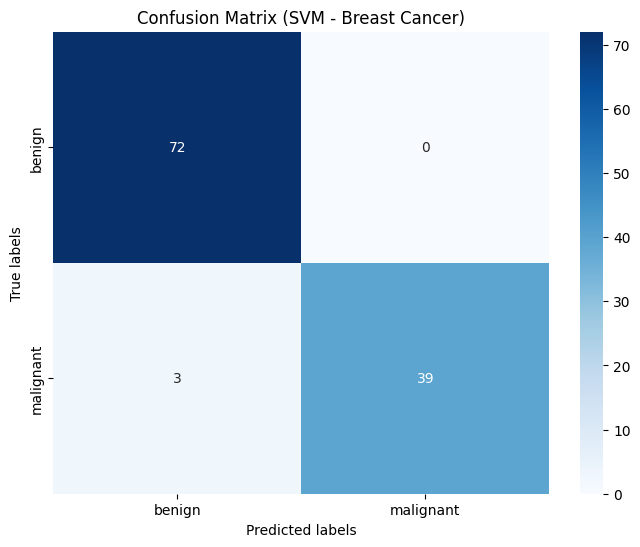

In [95]:
print("\nConfusion Matrix:")
# Improved Confusion Matrix display
cm_df = pd.DataFrame(conf_matrix,
                     index=[f'Actual {target_names_redefined[0]}', f'Actual {target_names_redefined[1]}'],
                     columns=[f'Pred {target_names_redefined[0]}', f'Pred {target_names_redefined[1]}'])
print(cm_df)

print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_redefined, yticklabels=target_names_redefined) # Add labels to heatmap
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (SVM - Breast Cancer)')
plt.show()

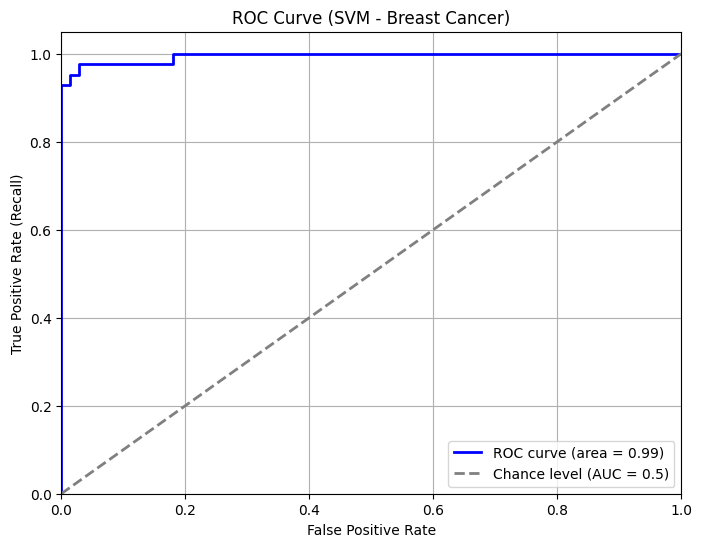

In [96]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob) # No need for pos_label here, it's implicit for binary with y_prob
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve (SVM - Breast Cancer)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


--- Visualizing SVM Decision Boundary ---


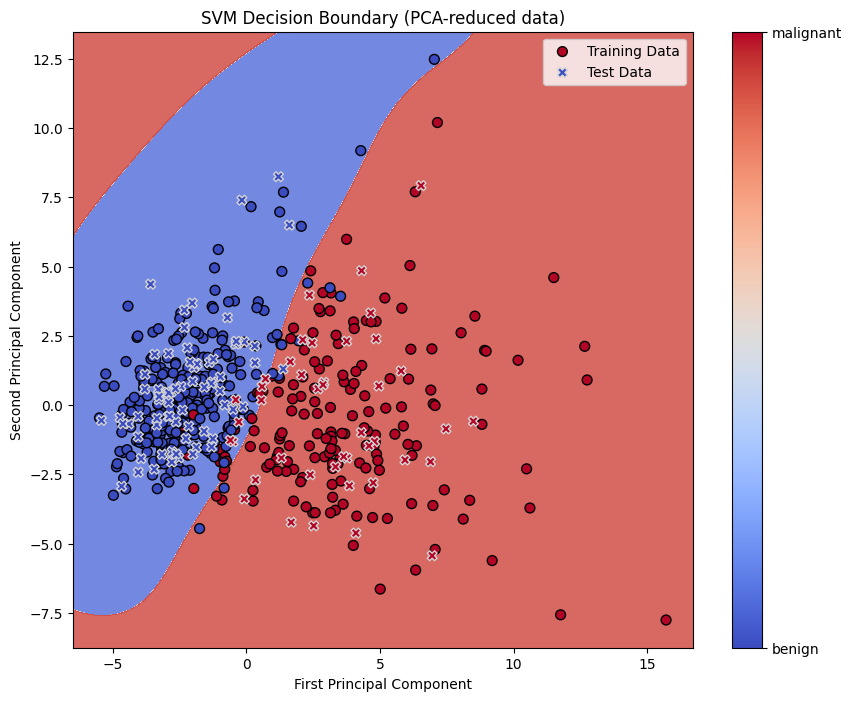

In [98]:
# --- Visualizing SVM Decision Boundary with two features (PCA-reduced data) ---
print("\n--- Visualizing SVM Decision Boundary ---")

# Use PCA to reduce data to 2D for visualization
# Fit PCA on X_train_scaled to avoid data leakage
pca = PCA(n_components=2, random_state=42) # Added random_state for reproducibility
X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled) # Transform test set using fitted PCA

# Train SVM on 2D data (from training set) for visualization
svm_2d = SVC(kernel='rbf', random_state=42) # Added random_state
svm_2d.fit(X_pca_train, y_train)

# Create a mesh grid to visualize decision boundaries
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Call make_meshgrid to create xx and yy grids
xx, yy = make_meshgrid(X_pca_train[:, 0], X_pca_train[:, 1])

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(10, 8))
X0, X1 = X_pca_train[:, 0], X_pca_train[:, 1] # Plot based on training data

plot_contours(ax, svm_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
scatter = ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k', label='Training Data') # Increased s for visibility

# Optionally, overlay test data points
scatter_test = ax.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_test, cmap=plt.cm.coolwarm,
                          s=50, edgecolors='lightgray', marker='X', linewidth=1, label='Test Data') # Use a different marker/color for test
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('SVM Decision Boundary (PCA-reduced data)')
cbar = plt.colorbar(scatter) # Add colorbar
cbar.set_ticks([0, 1])
cbar.set_ticklabels(target_names_redefined)
plt.legend()
plt.show()

## **Support Vector Machine for Regression**

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV # Import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# --- Section 2: Support Vector Machine for Regression (Diabetes Dataset) ---

print("--- Support Vector Machine for Regression (Diabetes Dataset) ---")

# Load diabetes dataset
diabetes = load_diabetes()
X_reg = diabetes.data
y_reg = diabetes.target
feature_names_reg = diabetes.feature_names # For completeness

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)

--- Support Vector Machine for Regression (Diabetes Dataset) ---


In [119]:
# Standardize features (crucial for SVR)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# --- Hyperparameter Tuning with GridSearchCV ---
print("\n--- Hyperparameter Tuning SVR with GridSearchCV ---")

# Define the parameter grid to search
# 'C': Regularization parameter. Higher C means less regularization (harder margin).
# 'gamma': Kernel coefficient for 'rbf', 'poly', 'sigmoid'. How far the influence of a single training example reaches.
# 'epsilon': Epsilon-tube within which no penalty is associated in the training loss function.
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'], # 'scale' uses 1 / (n_features * X.var())
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}


--- Hyperparameter Tuning SVR with GridSearchCV ---


In [120]:
# Initialize the SVR model (without specific params, GridSearchCV will test them)
base_svr = SVR(kernel='rbf')

# Initialize GridSearchCV
# cv=5: 5-fold cross-validation
# scoring='r2': Optimize for R-squared score
# verbose=2: Show more details during the search
# n_jobs=-1: Use all available CPU cores
grid_search = GridSearchCV(
    estimator=base_svr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

In [121]:
# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_reg_scaled, y_train_reg)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best R² score on training data (from CV): {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters found: {'C': 1000, 'epsilon': 0.2, 'gamma': 0.001}
Best R² score on training data (from CV): 0.4592


In [122]:
# --- Train the final SVR model with the best parameters ---
svr_model_tuned = grid_search.best_estimator_ # This is the SVR model trained with the best params

# Make predictions with the tuned model
y_pred_reg_tuned = svr_model_tuned.predict(X_test_reg_scaled)

# Evaluate the tuned model on the unseen test set
mse_tuned = mean_squared_error(y_test_reg, y_pred_reg_tuned)
r2_tuned = r2_score(y_test_reg, y_pred_reg_tuned)

print("\n--- Tuned SVM Regression (SVR) Results on Test Set ---")
print(f"Mean Squared Error (Tuned): {mse_tuned:.2f}")
print(f"R² Score (Tuned): {r2_tuned:.4f}")



--- Tuned SVM Regression (SVR) Results on Test Set ---
Mean Squared Error (Tuned): 2946.35
R² Score (Tuned): 0.4439


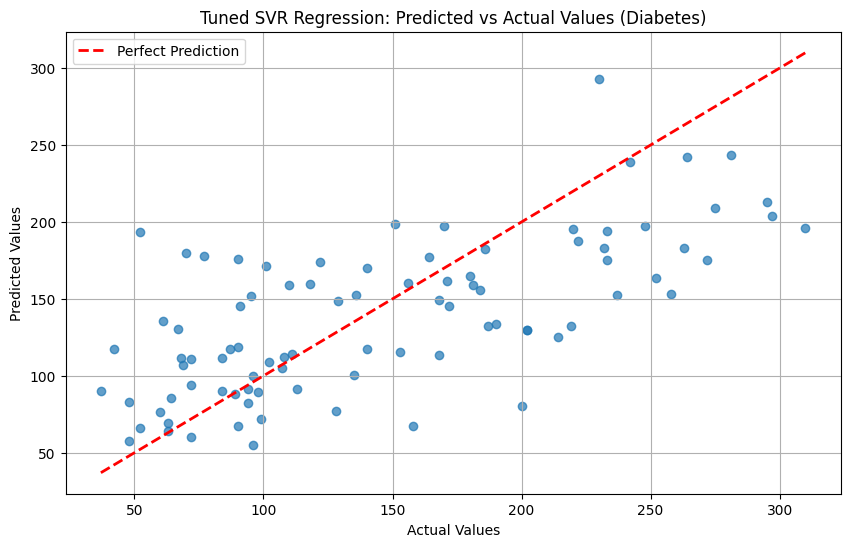


Detailed GridSearchCV results (first 5 rows):
   param_C param_gamma  param_epsilon  mean_test_score  rank_test_score
0      0.1       0.001           0.01        -0.042249               93
1      0.1        0.01           0.01        -0.032357               88
2      0.1         0.1           0.01        -0.024929               80
3      0.1           1           0.01        -0.043338               97
4      0.1       scale           0.01        -0.024920               79


In [124]:
# Plot actual vs predicted values for the tuned model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg_tuned, alpha=0.7) # Use tuned predictions
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Tuned SVR Regression: Predicted vs Actual Values (Diabetes)')
plt.grid(True)
plt.legend()
plt.show()

# You might also want to inspect the performance of individual parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)
print("\nDetailed GridSearchCV results (first 5 rows):")
print(results_df[['param_C', 'param_gamma', 'param_epsilon', 'mean_test_score', 'rank_test_score']].head())

# **Naive Bayes**

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, fetch_20newsgroups # Load both datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize # Import label_binarize
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_curve, auc, roc_auc_score # Import auc for multi-class ROC plotting
)
from itertools import cycle # For plotting colors

In [103]:
# --- Section 1: Gaussian Naive Bayes for Numerical Data (Wine Dataset) ---

print("--- Gaussian Naive Bayes for Numerical Data (Wine Dataset) ---")

# Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Added stratify=y for balanced class distribution

# Standardize features (important for Gaussian Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

--- Gaussian Naive Bayes for Numerical Data (Wine Dataset) ---


In [104]:
# Create and train Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [105]:
# Make predictions
y_pred = nb_classifier.predict(X_test_scaled) # Use scaled data for prediction
y_prob = nb_classifier.predict_proba(X_test_scaled) # Get probabilities for all classes


In [106]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# For multiclass, precision, recall, f1_score need 'average' parameter.
# 'weighted' is good when class imbalance is present or you want to reflect overall performance.
# 'macro' treats all classes equally.
precision_multi = precision_score(y_test, y_pred, average='weighted')
recall_multi = recall_score(y_test, y_pred, average='weighted')
f1_multi = f1_score(y_test, y_pred, average='weighted')

In [107]:
class_report = classification_report(y_test, y_pred, target_names=target_names)

print(f"\nGaussian Naive Bayes Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision_multi:.4f}")
print(f"Recall (weighted): {recall_multi:.4f}")
print(f"F1 Score (weighted): {f1_multi:.4f}")

print("\nConfusion Matrix:")
# Improved Confusion Matrix display
cm_df = pd.DataFrame(conf_matrix,
                     index=[f'Actual {name}' for name in target_names],
                     columns=[f'Pred {name}' for name in target_names])
print(cm_df)

print("\nClassification Report:")
print(class_report)



Gaussian Naive Bayes Results:
Accuracy: 0.9722
Precision (weighted): 0.9744
Recall (weighted): 0.9722
F1 Score (weighted): 0.9723

Confusion Matrix:
                Pred class_0  Pred class_1  Pred class_2
Actual class_0            12             0             0
Actual class_1             1            13             0
Actual class_2             0             0            10

Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



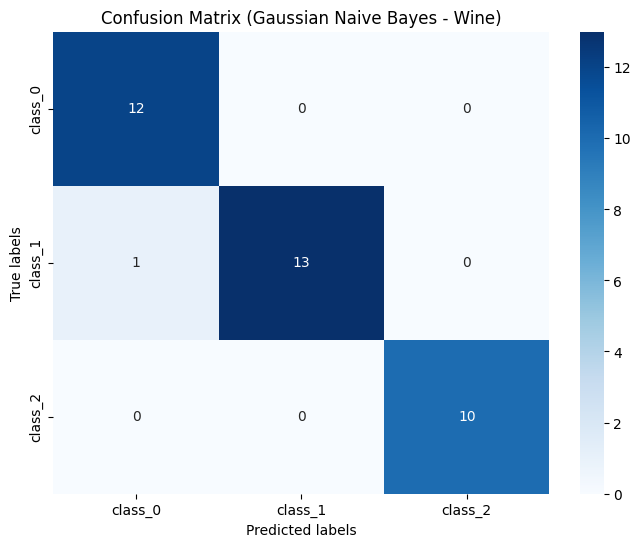

In [108]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Gaussian Naive Bayes - Wine)')
plt.show()


--- Multi-class ROC Curve Plotting (Wine Dataset) ---


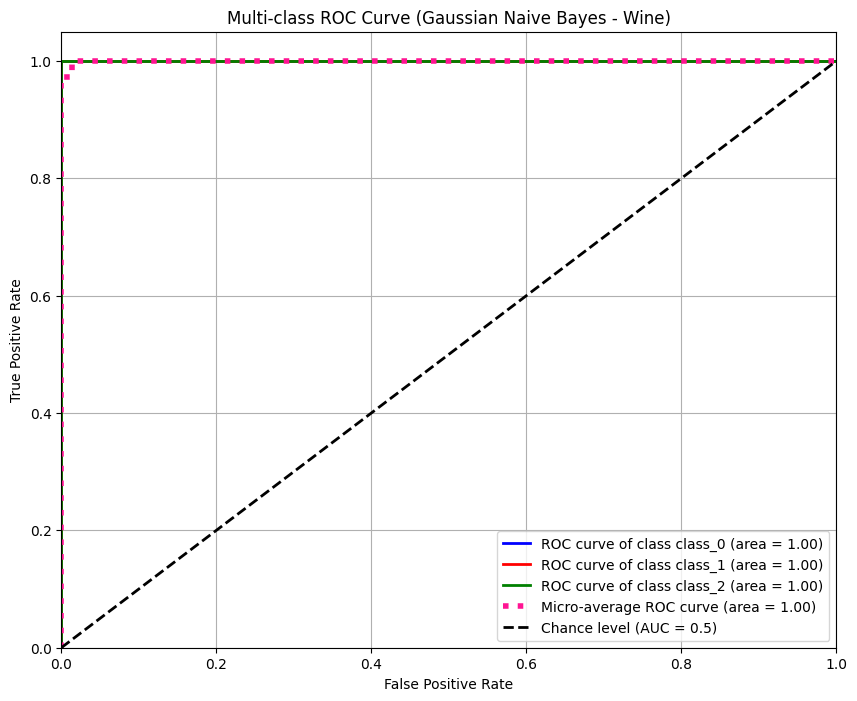

In [110]:
# --- Multi-class ROC Curve Plotting (One-vs-Rest) ---
print("\n--- Multi-class ROC Curve Plotting (Wine Dataset) ---")
# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y)) # Use np.unique(y) for classes
n_classes = y_test_bin.shape[1]
# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'darkorange', 'purple']) # Ensure enough colors
for i, color, target in zip(range(n_classes), colors, target_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {target} (area = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4) # Plot micro-average

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance level (AUC = 0.5)') # Label chance level
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (Gaussian Naive Bayes - Wine)')
plt.legend(loc="lower right")
plt.grid(True) # Add grid for better readability
plt.show()

In [ ]:
# --- Section 2: Comparing Different Naive Bayes Variants on Text Data ---

print("\n--- Comparing Naive Bayes Variants on Text Classification (20 Newsgroups) ---")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Import text vectorizers


In [112]:
# Get text data (subset of 20 newsgroups)
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(
    subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(
    subset='test', categories=categories, shuffle=True, random_state=42)

# Create feature vectors (CountVectorizer)
# CountVectorizer and TfidfVectorizer should be imported in a previous cell
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_test_counts = count_vect.transform(twenty_test.data)

In [113]:
# TF-IDF features (TfidfVectorizer)
tfidf_vect = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vect.fit_transform(twenty_train.data)
X_test_tfidf = tfidf_vect.transform(twenty_test.data)

# Train MultinomialNB with count vectors
mnb_count = MultinomialNB()
mnb_count.fit(X_train_counts, twenty_train.target)
y_pred_mnb_count = mnb_count.predict(X_test_counts)


In [114]:
# Train MultinomialNB with TF-IDF
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, twenty_train.target)
y_pred_mnb_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Train BernoulliNB with binary features
# BernoulliNB expects binary (0/1) features. toarray() converts sparse matrix to dense array.
# .astype(bool).astype(int) converts counts to binary presence/absence.
bnb = BernoulliNB()
bnb.fit(X_train_counts.astype(bool).astype(int), twenty_train.target) # Corrected conversion
y_pred_bnb = bnb.predict(X_test_counts.astype(bool).astype(int)) # Corrected conversion


In [116]:
# Compare performance
print("\nNaive Bayes Variants on Text Classification:")
print(f"MultinomialNB with Count Vectors Accuracy: {accuracy_score(twenty_test.target, y_pred_mnb_count):.4f}")
print(f"MultinomialNB with TF-IDF Accuracy: {accuracy_score(twenty_test.target, y_pred_mnb_tfidf):.4f}")
print(f"BernoulliNB Accuracy: {accuracy_score(twenty_test.target, y_pred_bnb):.4f}")


print("\nMultinomialNB (Count) Report:\n", classification_report(twenty_test.target, y_pred_mnb_count, target_names=categories))
print("\nMultinomialNB (TF-IDF) Report:\n", classification_report(twenty_test.target, y_pred_mnb_tfidf, target_names=categories))
print("\nBernoulliNB Report:\n", classification_report(twenty_test.target, y_pred_bnb, target_names=categories))


Naive Bayes Variants on Text Classification:
MultinomialNB with Count Vectors Accuracy: 0.9421
MultinomialNB with TF-IDF Accuracy: 0.8895
BernoulliNB Accuracy: 0.8256

MultinomialNB (Count) Report:
                         precision    recall  f1-score   support

           alt.atheism       0.93      0.91      0.92       319
soc.religion.christian       0.95      0.97      0.96       389
         comp.graphics       0.96      0.92      0.94       396
               sci.med       0.93      0.96      0.95       398

              accuracy                           0.94      1502
             macro avg       0.94      0.94      0.94      1502
          weighted avg       0.94      0.94      0.94      1502


MultinomialNB (TF-IDF) Report:
                         precision    recall  f1-score   support

           alt.atheism       0.97      0.72      0.83       319
soc.religion.christian       0.95      0.95      0.95       389
         comp.graphics       0.95      0.88      0.92      

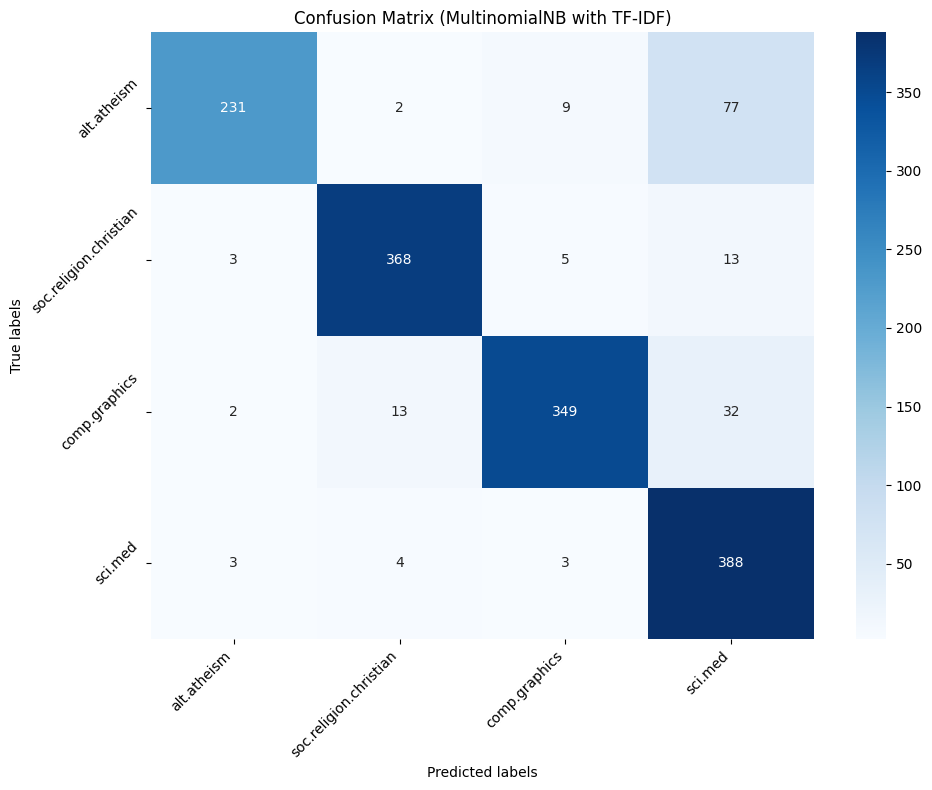

In [117]:
# Confusion matrix for the best model (typically TF-IDF for text)
plt.figure(figsize=(10, 8))
conf_mat_tfidf = confusion_matrix(twenty_test.target, y_pred_mnb_tfidf)
sns.heatmap(conf_mat_tfidf, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (MultinomialNB with TF-IDF)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# **Gradient Boosting**

## **Gradient Boosting for Classification**

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer,fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, auc, mean_squared_error, mean_absolute_error,
                             r2_score)

import warnings
warnings.filterwarnings('ignore') # Filter warnings for cleaner output during development

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [127]:
print("=" * 80)
print("PART 1: GRADIENT BOOSTING FOR CLASSIFICATION")
print("=" * 80)

# 1. Load and prepare the classification data
print("Loading and preprocessing classification data...")
data = load_breast_cancer()
X = data.data
y = data.target # Original: 0=malignant, 1=benign
feature_names = data.feature_names
original_target_names = data.target_names # Store original names for reference

PART 1: GRADIENT BOOSTING FOR CLASSIFICATION
Loading and preprocessing classification data...


In [129]:
# --- REMAPPING TARGET LABELS FOR INTUITIVE POSITIVE CLASS ---
# Re-map target to make 'malignant' (cancer) the positive class (1)
# The default load_breast_cancer has 0: malignant, 1: benign.
# We reverse this so 0: benign, 1: malignant for intuitive metrics (pos_label=1).
y_redefined = np.where(y == 0, 1, 0)
target_names_redefined = ['benign', 'malignant'] # Update names to match new y
# -----------------------------------------------------------
# Display dataset information
print(f"Dataset: Breast Cancer Wisconsin")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Original Classes: {original_target_names}")
print(f"Original Class distribution (0: malignant, 1: benign): {pd.Series(y).value_counts()}")
print(f"Redefined Class distribution (0: benign, 1: malignant): {pd.Series(y_redefined).value_counts()}\n")

Dataset: Breast Cancer Wisconsin
Number of samples: 569
Number of features: 30
Original Classes: ['malignant' 'benign']
Original Class distribution (0: malignant, 1: benign): 1    357
0    212
Name: count, dtype: int64
Redefined Class distribution (0: benign, 1: malignant): 0    357
1    212
Name: count, dtype: int64



In [130]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_redefined, # Use redefined target for consistent analysis
    test_size=0.25,
    random_state=42,
    stratify=y_redefined # Stratify based on the redefined target
)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}\n")

Training set size: 426
Test set size: 143



In [132]:
# 2. Basic Gradient Boosting implementation for classification
print("Training basic Gradient Boosting classification model...")
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)
y_pred_prob = gb_clf.predict_proba(X_test)[:, 1] # Probability of the positive class (1, malignant)


Training basic Gradient Boosting classification model...


In [133]:
# 3. Model evaluation for classification
print("\n--- Classification Model Evaluation (Basic Model) ---")
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


--- Classification Model Evaluation (Basic Model) ---
Accuracy: 0.9650



Classification Report:
              precision    recall  f1-score   support

      benign       0.95      1.00      0.97        90
   malignant       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



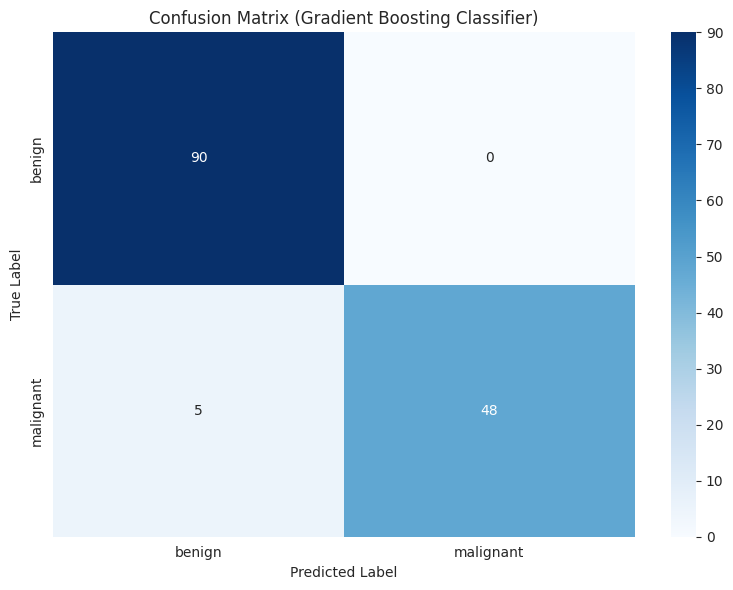

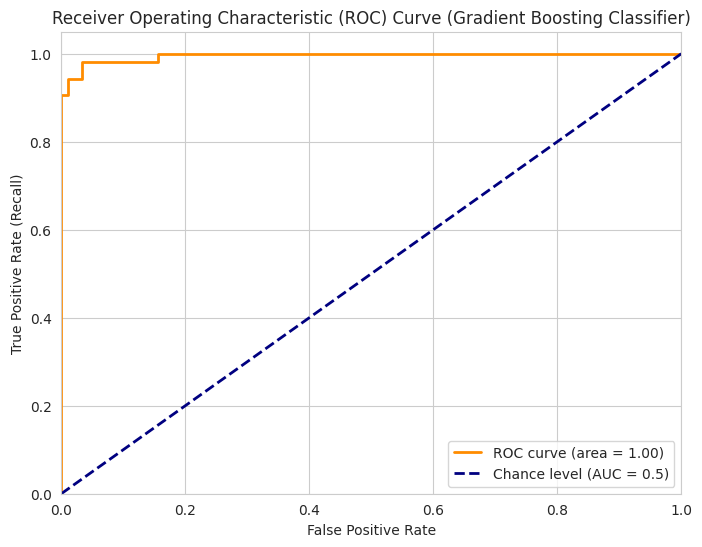

In [134]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names_redefined))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_redefined, yticklabels=target_names_redefined)
plt.title('Confusion Matrix (Gradient Boosting Classifier)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance level (AUC = 0.5)') # Added explicit label
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)') # More descriptive label
plt.title('Receiver Operating Characteristic (ROC) Curve (Gradient Boosting Classifier)')
plt.legend(loc="lower right")
plt.grid(True) # Add grid for better readability
plt.show()

In [135]:
# 4. Cross-validation for classification
# Note: Using X_train, y_train for CV as GridSearchCV will also use it.
# We don't scale here, as GBT is tree-based and less sensitive to scaling,
# but if you were to scale, you would apply it before CV.
cv_scores = cross_val_score(gb_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"\nCross-validation scores (Basic Model): {cv_scores}")
print(f"Mean CV accuracy (Basic Model): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validation scores (Basic Model): [0.96511628 0.98823529 0.95294118 0.96470588 0.92941176]
Mean CV accuracy (Basic Model): 0.9601 ± 0.0191


In [136]:
# 5. Hyperparameter tuning for classification
print("\n--- Classification Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10], # Minimum samples required to split an internal node
    'subsample': [0.8, 0.9, 1.0] # Fraction of samples to be used for fitting the individual base learners.
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1, # Use all available CPU cores
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (from CV): {grid_search.best_score_:.4f}")



--- Classification Hyperparameter Tuning ---
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score (from CV): 0.9695


In [137]:
# Use the best model found by GridSearchCV
best_gb_clf = grid_search.best_estimator_
y_pred_best = best_gb_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best model on test set: {accuracy_best:.4f}")

# Print classification report for the best model
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best, target_names=target_names_redefined))

Accuracy with best model on test set: 0.9650

Classification Report (Best Model):
              precision    recall  f1-score   support

      benign       0.95      1.00      0.97        90
   malignant       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



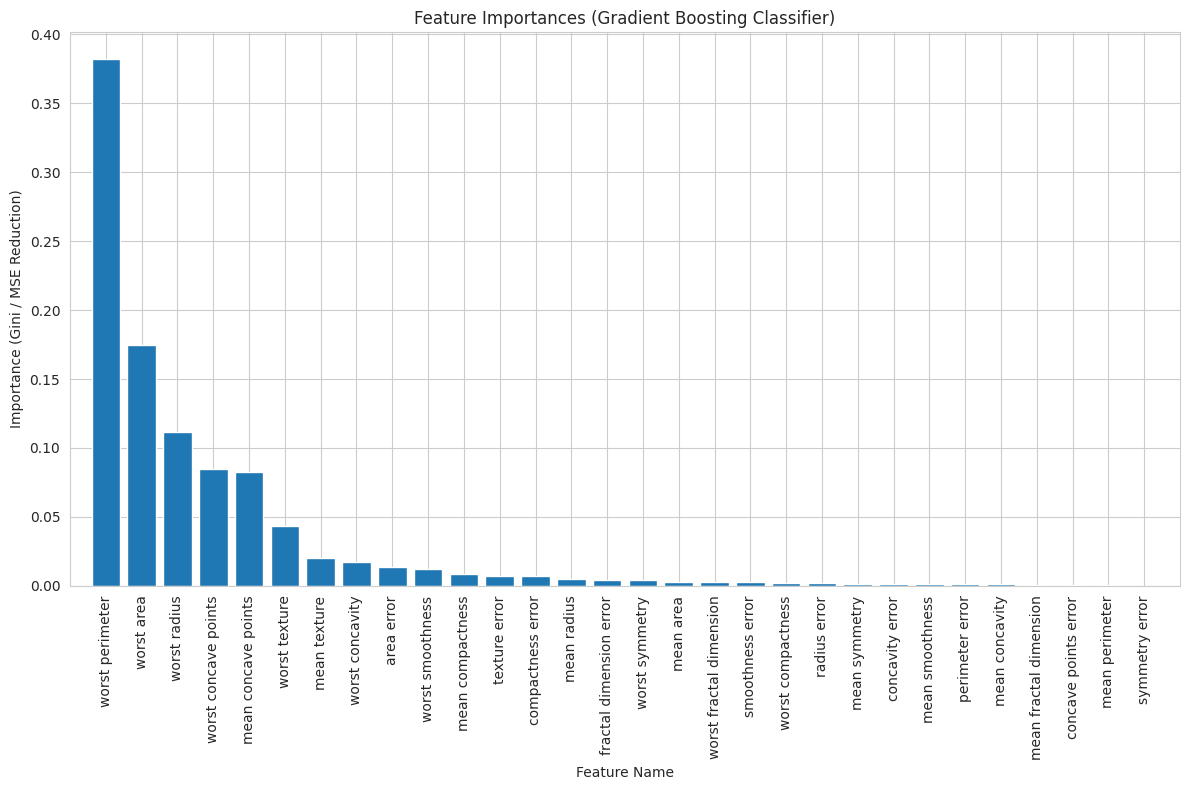

In [138]:
# 6. Feature importance for classification
feature_importances = best_gb_clf.feature_importances_
indices = np.argsort(feature_importances)[::-1] # Sort in descending order

plt.figure(figsize=(12, 8))
plt.title('Feature Importances (Gradient Boosting Classifier)')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature Name') # Added label
plt.ylabel('Importance (Gini / MSE Reduction)') # More specific label
plt.tight_layout()
plt.show()

In [139]:
# Top 10 features
print("\nTop 10 important features:")
for i in range(min(10, len(feature_names))): # Use min() to prevent errors if <10 features
    print(f"{i+1}. {feature_names[indices[i]]}: {feature_importances[indices[i]]:.4f}")



Top 10 important features:
1. worst perimeter: 0.3824
2. worst area: 0.1746
3. worst radius: 0.1119
4. worst concave points: 0.0844
5. mean concave points: 0.0829
6. worst texture: 0.0434
7. mean texture: 0.0199
8. worst concavity: 0.0175
9. area error: 0.0138
10. worst smoothness: 0.0123


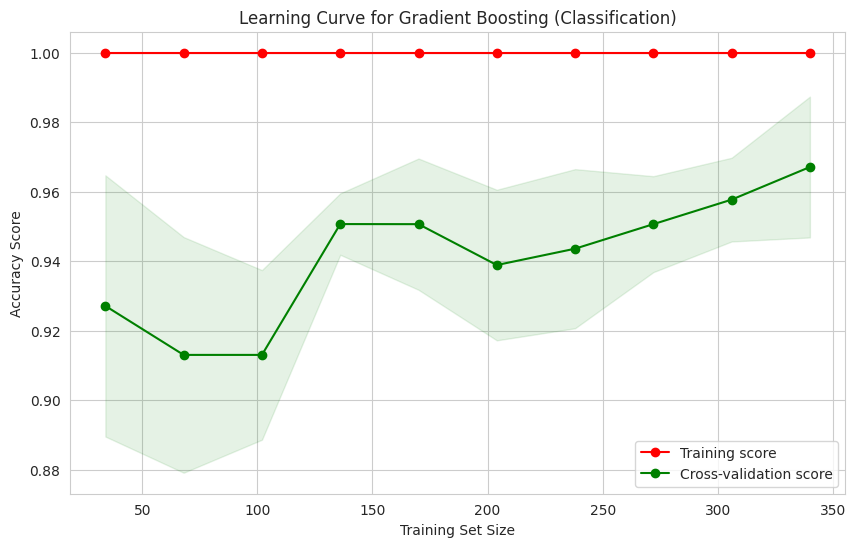

In [140]:
# 7. Learning curve for classification
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingClassifier(**grid_search.best_params_, random_state=42),
    X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1 # Use all available CPU cores
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.title('Learning Curve for Gradient Boosting (Classification)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

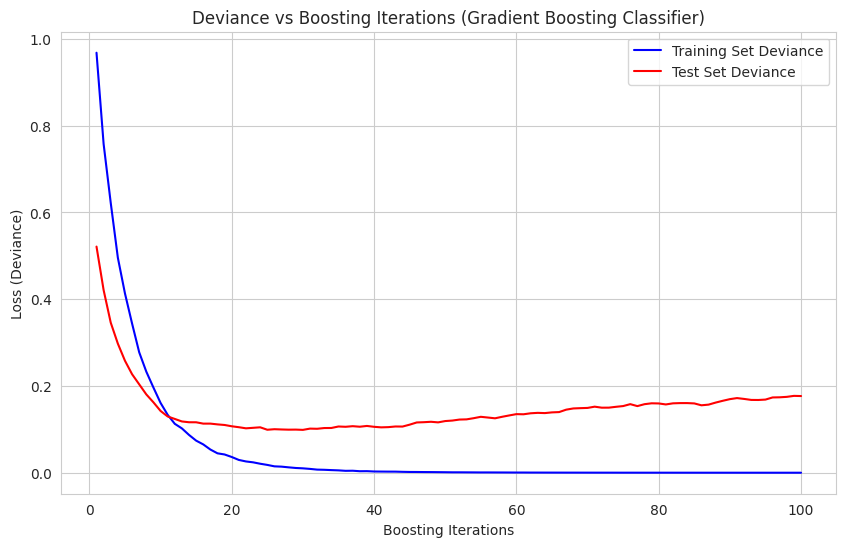

In [142]:
# 8. Plot the training error over boosting iterations (Deviance Plot)
# Note: best_gb_clf.train_score_ contains the deviance for each iteration on the training set.

from sklearn.metrics import log_loss # Import log_loss

test_score = np.zeros((best_gb_clf.n_estimators,), dtype=np.float64)
for i, y_pred_proba in enumerate(best_gb_clf.staged_predict_proba(X_test)):
    # log_loss expects probabilities for each class [:, 0] and [:, 1]
    test_score[i] = log_loss(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(best_gb_clf.n_estimators) + 1, best_gb_clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(best_gb_clf.n_estimators) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Loss (Deviance)')
plt.title('Deviance vs Boosting Iterations (Gradient Boosting Classifier)')
plt.show()

## **Gradient Boosting for Regression**

In [143]:
print("\n" + "=" * 80)
print("PART 2: GRADIENT BOOSTING FOR REGRESSION")
print("=" * 80)

# 1. Load and prepare the regression data
print("Loading and preprocessing regression data...")
try:
    # Use fetch_california_housing as the primary dataset due to load_boston deprecation
    data = fetch_california_housing()
    dataset_name = "California Housing"
    print("Using California Housing dataset (Boston Housing is deprecated).")
except:
    # Fallback in case fetch_california_housing also has issues (unlikely)
    data = load_boston() # This line will likely raise a warning if not using scikit-learn < 1.2
    dataset_name = "Boston Housing (Fallback - Deprecated)"
    print("Using deprecated Boston Housing dataset as fallback.")


PART 2: GRADIENT BOOSTING FOR REGRESSION
Loading and preprocessing regression data...
Using California Housing dataset (Boston Housing is deprecated).


In [144]:
X_reg = data.data
y_reg = data.target
reg_feature_names = data.feature_names

# Display dataset information
print(f"Dataset: {dataset_name}")
print(f"Number of samples: {X_reg.shape[0]}")
print(f"Number of features: {X_reg.shape[1]}")
print(f"Target variable: Housing price")
print(f"Target statistics: Min={y_reg.min():.2f}, Max={y_reg.max():.2f}, Mean={y_reg.mean():.2f}, Std={y_reg.std():.2f}\n")


Dataset: California Housing
Number of samples: 20640
Number of features: 8
Target variable: Housing price
Target statistics: Min=0.15, Max=5.00, Mean=2.07, Std=1.15



In [145]:
# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)
print(f"Training set size: {X_train_reg.shape[0]}")
print(f"Test set size: {X_test_reg.shape[0]}\n")

Training set size: 15480
Test set size: 5160



In [146]:
# Standardize features (often beneficial for tree-based models, but not strictly necessary as with linear models)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)


In [147]:
# 2. Basic Gradient Boosting implementation for regression
print("Training basic Gradient Boosting regression model...")
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train_reg_scaled, y_train_reg)

Training basic Gradient Boosting regression model...


GradientBoostingRegressor(random_state=42)

In [148]:
# Make predictions
y_pred_reg = gb_reg.predict(X_test_reg_scaled)



--- Regression Model Evaluation (Basic Model) ---
Mean Squared Error (MSE): 0.2895
Root Mean Squared Error (RMSE): 0.5381
Mean Absolute Error (MAE): 0.3712
R² Score: 0.7812


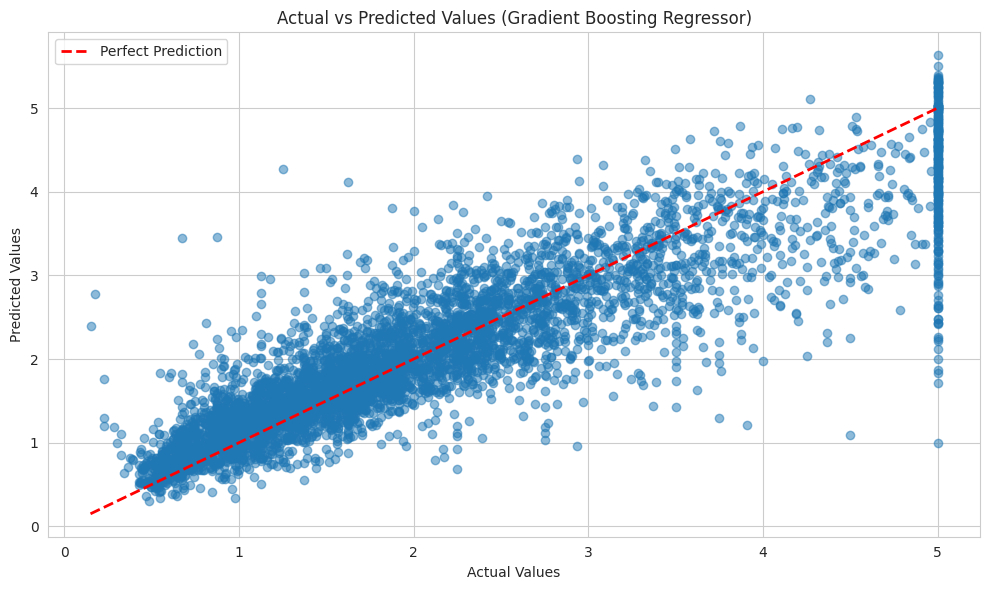

In [149]:
# 3. Model evaluation for regression
print("\n--- Regression Model Evaluation (Basic Model) ---")
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2, label='Perfect Prediction') # Added label and lw
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Gradient Boosting Regressor)')
plt.grid(True) # Added grid
plt.legend() # Added legend
plt.tight_layout()
plt.show()

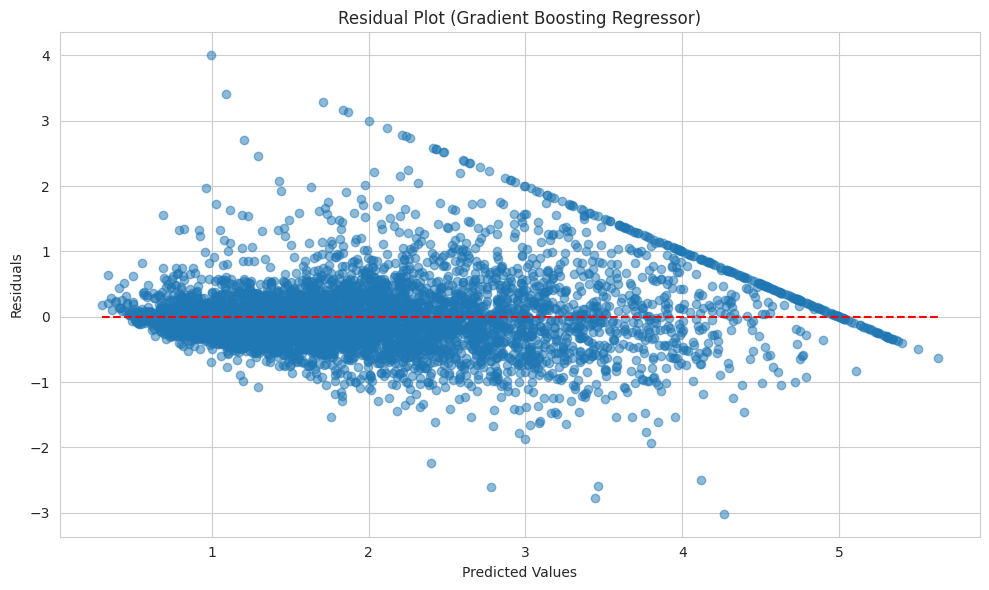

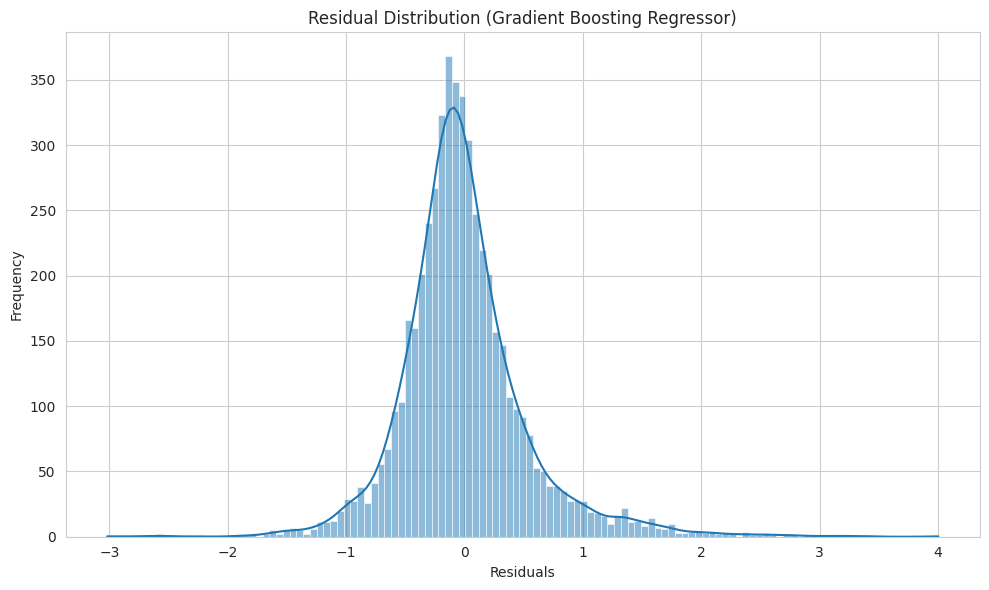

In [150]:
# Plot residuals
residuals = y_test_reg - y_pred_reg
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_reg, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_reg.min(), xmax=y_pred_reg.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Values') # Consistent label
plt.ylabel('Residuals')
plt.title('Residual Plot (Gradient Boosting Regressor)')
plt.tight_layout()
plt.show()

# Residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution (Gradient Boosting Regressor)')
plt.tight_layout()
plt.show()

In [151]:
# 4. Cross-validation for regression
cv_scores_reg = cross_val_score(gb_reg, X_train_reg_scaled, y_train_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse = np.sqrt(-cv_scores_reg) # Convert negative MSE to positive RMSE
print(f"\nCross-validation RMSE scores (Basic Model): {cv_rmse}")
print(f"Mean CV RMSE (Basic Model): {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")



Cross-validation RMSE scores (Basic Model): [0.54416388 0.50912527 0.5488061  0.52569635 0.54258509]
Mean CV RMSE (Basic Model): 0.5341 ± 0.0147


In [154]:
# 5. Hyperparameter tuning for regression
print("\n--- Regression Hyperparameter Tuning ---")

# Option A (Recommended): Focused search on primary parameters, with good defaults for others.
# This significantly reduces combinations and speeds up tuning while maintaining good regularization.
param_grid_reg = {
    'n_estimators': [100, 200, 300], # Potentially higher n_estimators for better performance
    'learning_rate': [0.05, 0.1, 0.15], # More granular search around 0.1
    'max_depth': [3, 4, 5],
    # Fixed 'min_samples_split' and 'subsample' to reasonable defaults or insights
    # If you remove them from param_grid, they will use GradientBoostingRegressor's default values
    # Default for min_samples_split is 2
    # Default for subsample is 1.0 (no subsampling)
    # If you want to force subsampling, you could add: 'subsample': [0.8] or set it directly in the estimator
}

# If you want to explicitly use a subsample value (e.g., 0.8) and keep min_samples_split default:
# param_grid_reg = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.05, 0.1, 0.15],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8] # Explicitly try a good subsample value
# }

# Initialize GridSearchCV with the reduced param_grid
grid_search_reg = GridSearchCV(
    GradientBoostingRegressor(random_state=42), # min_samples_split defaults to 2, subsample to 1.0
    param_grid=param_grid_reg,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_reg.fit(X_train_reg_scaled, y_train_reg)

print(f"\nBest parameters: {grid_search_reg.best_params_}")
print(f"Best cross-validation RMSE (from CV): {np.sqrt(-grid_search_reg.best_score_):.4f}")


--- Regression Hyperparameter Tuning ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters: {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 300}
Best cross-validation RMSE (from CV): 0.4732


In [155]:
# Use the best model
best_gb_reg = grid_search_reg.best_estimator_
y_pred_reg_best = best_gb_reg.predict(X_test_reg_scaled)
rmse_best = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_best))
r2_best = r2_score(y_test_reg, y_pred_reg_best)
print(f"RMSE with best model on test set: {rmse_best:.4f}")
print(f"R² with best model on test set: {r2_best:.4f}")

RMSE with best model on test set: 0.4643
R² with best model on test set: 0.8371


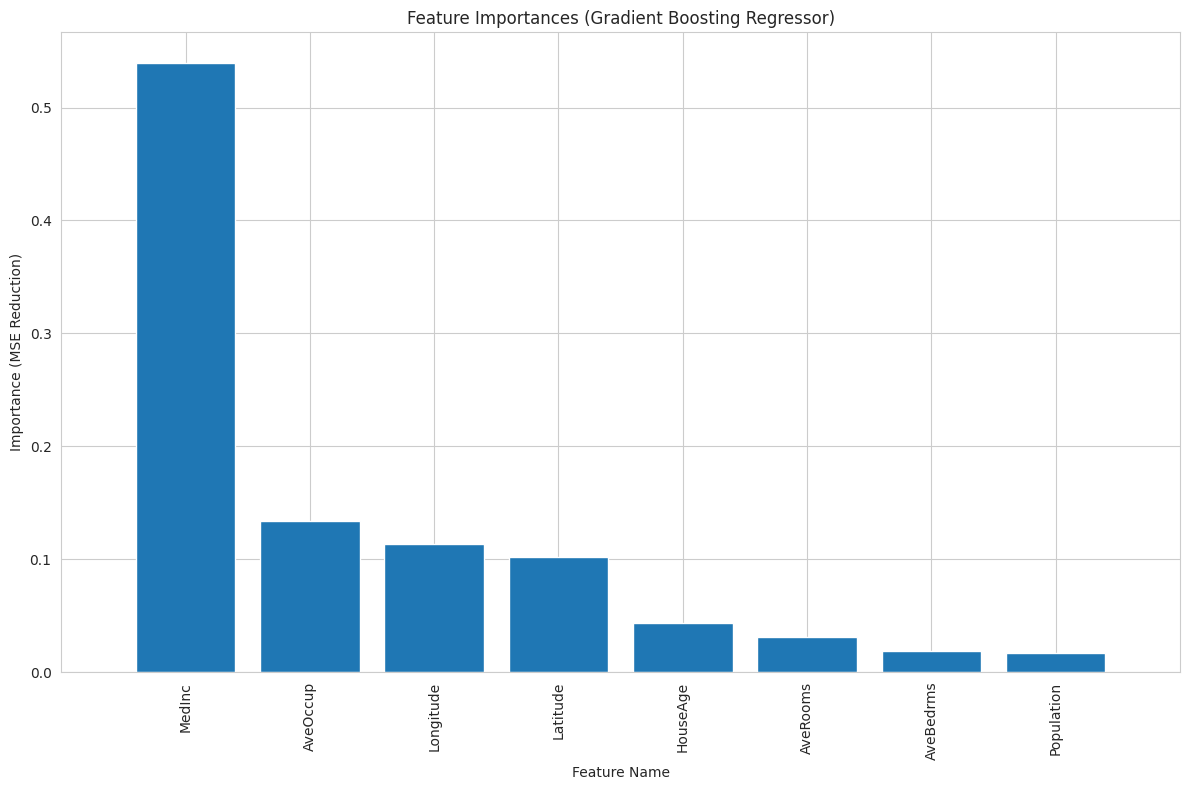


Top important features (Regression):
1. MedInc: 0.5396
2. AveOccup: 0.1334
3. Longitude: 0.1138
4. Latitude: 0.1023
5. HouseAge: 0.0439
6. AveRooms: 0.0315
7. AveBedrms: 0.0185
8. Population: 0.0171


In [156]:
# 6. Feature importance for regression
feature_importances_reg = best_gb_reg.feature_importances_
indices_reg = np.argsort(feature_importances_reg)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances (Gradient Boosting Regressor)')
plt.bar(range(X_reg.shape[1]), feature_importances_reg[indices_reg], align='center')
plt.xticks(range(X_reg.shape[1]), [reg_feature_names[i] for i in indices_reg], rotation=90)
plt.xlim([-1, X_reg.shape[1]])
plt.xlabel('Feature Name') # Added label
plt.ylabel('Importance (MSE Reduction)') # Specific label
plt.tight_layout()
plt.show()

# Top features
print("\nTop important features (Regression):")
for i in range(min(10, len(reg_feature_names))):
    print(f"{i+1}. {reg_feature_names[indices_reg[i]]}: {feature_importances_reg[indices_reg[i]]:.4f}")

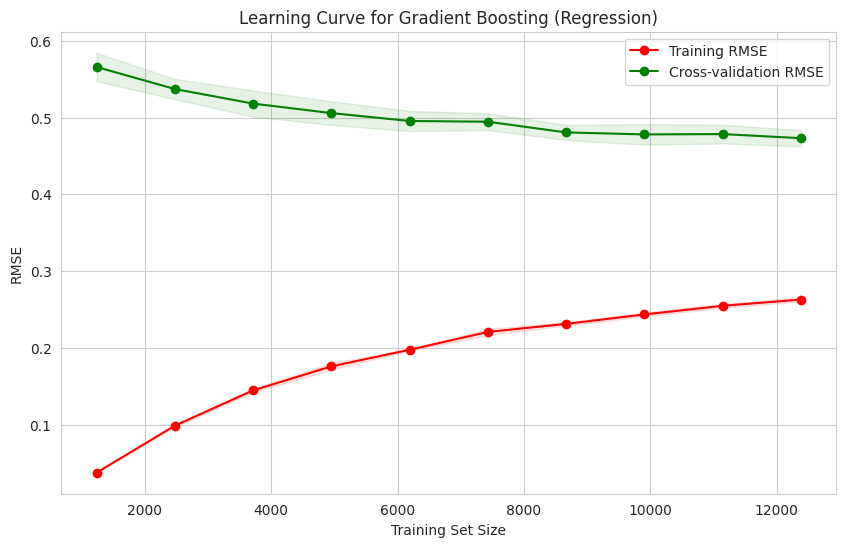

In [157]:
# 7. Learning curve for regression
train_sizes_reg, train_scores_reg, test_scores_reg = learning_curve(
    GradientBoostingRegressor(**grid_search_reg.best_params_, random_state=42),
    X_train_reg_scaled, y_train_reg, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1 # Use all available CPU cores
)

train_scores_reg_rmse = np.sqrt(-train_scores_reg) # Convert negative MSE to RMSE
test_scores_reg_rmse = np.sqrt(-test_scores_reg) # Convert negative MSE to RMSE

train_mean_reg = np.mean(train_scores_reg_rmse, axis=1)
train_std_reg = np.std(train_scores_reg_rmse, axis=1)
test_mean_reg = np.mean(test_scores_reg_rmse, axis=1)
test_std_reg = np.std(test_scores_reg_rmse, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_reg, train_mean_reg, 'o-', color='r', label='Training RMSE')
plt.plot(train_sizes_reg, test_mean_reg, 'o-', color='g', label='Cross-validation RMSE')
plt.fill_between(train_sizes_reg, train_mean_reg - train_std_reg, train_mean_reg + train_std_reg, alpha=0.1, color='r')
plt.fill_between(train_sizes_reg, test_mean_reg - test_std_reg, test_mean_reg + test_std_reg, alpha=0.1, color='g')
plt.title('Learning Curve for Gradient Boosting (Regression)')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid(True)
plt.show()

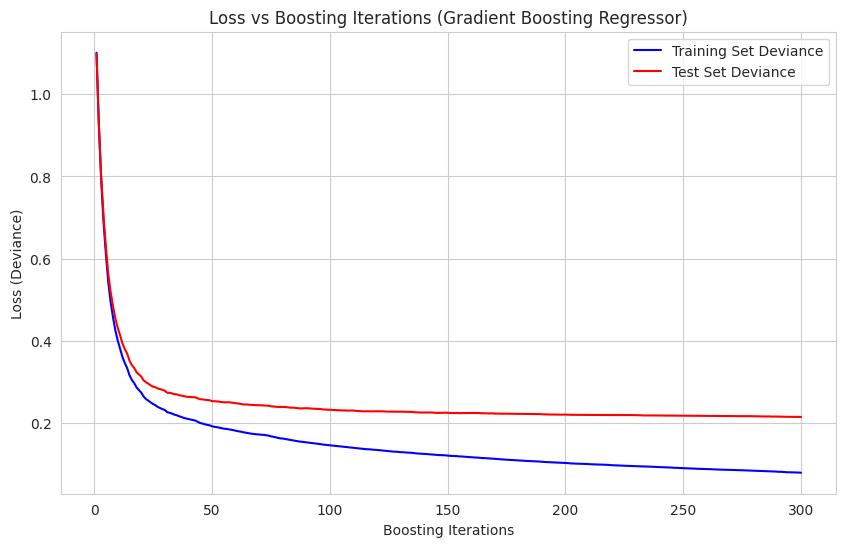


Gradient Boosting Regression implementation complete!


In [159]:
# 8. Plot the training deviance over boosting iterations for regression
from sklearn.metrics import mean_squared_error

test_score_reg = np.zeros((best_gb_reg.n_estimators,), dtype=np.float64)

# Calculate the test deviance manually using the appropriate loss function (Mean Squared Error for default)
# Iterate through staged predictions for the test set
for i, y_pred in enumerate(best_gb_reg.staged_predict(X_test_reg_scaled)):
    # Calculate the Mean Squared Error for the current stage's predictions
    test_score_reg[i] = mean_squared_error(y_test_reg, y_pred)

plt.figure(figsize=(10, 6))
# best_gb_reg.train_score_ holds the training deviance for each iteration
plt.plot(np.arange(best_gb_reg.n_estimators) + 1, best_gb_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(best_gb_reg.n_estimators) + 1, test_score_reg, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Loss (Deviance)') # Or be more specific, e.g., 'Mean Squared Error (Deviance)'
plt.title('Loss vs Boosting Iterations (Gradient Boosting Regressor)')
plt.show()

print("\nGradient Boosting Regression implementation complete!")

# **K Nearest Neighbors**

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.inspection import DecisionBoundaryDisplay # For visualizing decision boundaries
import warnings
warnings.filterwarnings('ignore')
# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("=" * 80)
print("K-Nearest Neighbors (KNN) Algorithm Implementation")
print("=" * 80)


K-Nearest Neighbors (KNN) Algorithm Implementation


In [161]:
# 1. Load and prepare the data
print("Loading and preprocessing data...")
data = load_breast_cancer()
X = data.data
y = data.target # Original: 0=malignant, 1=benign
feature_names = data.feature_names
original_target_names = data.target_names # Store original names for reference

# --- REMAPPING TARGET LABELS FOR INTUITIVE POSITIVE CLASS ---
# Re-map target to make 'malignant' (cancer) the positive class (1)
# The default load_breast_cancer has 0: malignant, 1: benign.
# We reverse this so 0: benign, 1: malignant for intuitive metrics (pos_label=1).
y_redefined = np.where(y == 0, 1, 0)
target_names_redefined = ['benign', 'malignant'] # Update names to match new y
# -----------------------------------------------------------


Loading and preprocessing data...


In [162]:
# Display dataset information
print(f"Dataset: Breast Cancer Wisconsin")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Original Classes: {original_target_names}")
print(f"Original Class distribution (0: malignant, 1: benign): {pd.Series(y).value_counts()}")
print(f"Redefined Class distribution (0: benign, 1: malignant): {pd.Series(y_redefined).value_counts()}\n")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_redefined, # Use redefined target for consistent analysis
    test_size=0.25,
    random_state=42,
    stratify=y_redefined # Stratify based on the redefined target
)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}\n")

# Standardize features (important for KNN as it uses distance calculations)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Dataset: Breast Cancer Wisconsin
Number of samples: 569
Number of features: 30
Original Classes: ['malignant' 'benign']
Original Class distribution (0: malignant, 1: benign): 1    357
0    212
Name: count, dtype: int64
Redefined Class distribution (0: benign, 1: malignant): 0    357
1    212
Name: count, dtype: int64

Training set size: 426
Test set size: 143



In [163]:
# 2. Basic KNN implementation
print("Training basic KNN model...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)
y_pred_prob = knn.predict_proba(X_test_scaled)[:, 1] # Probability for positive class (1, malignant)


Training basic KNN model...



--- Model Evaluation (Basic Model) ---
Accuracy: 0.9580

Classification Report:
              precision    recall  f1-score   support

      benign       0.95      0.99      0.97        90
   malignant       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



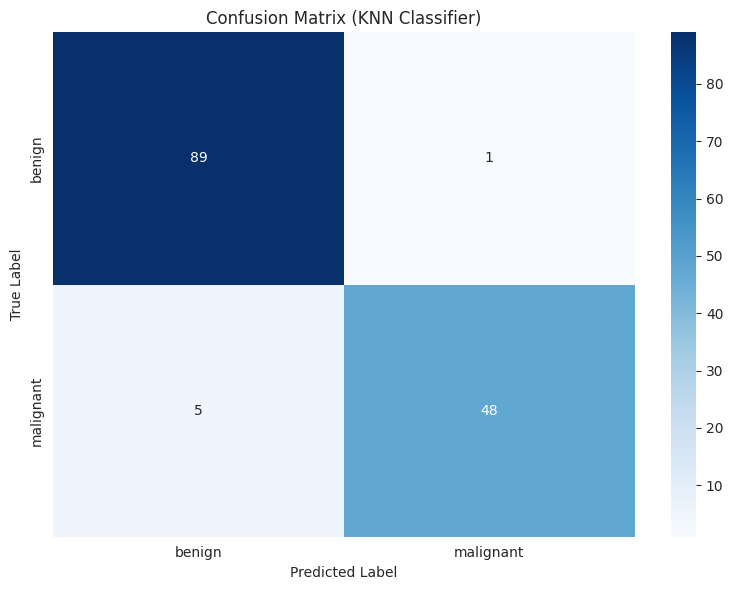

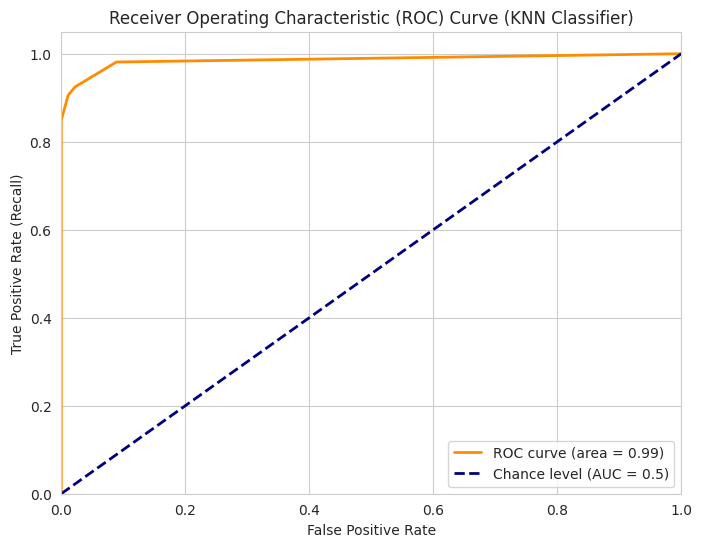

In [164]:
# 3. Model evaluation
print("\n--- Model Evaluation (Basic Model) ---")
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names_redefined))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_redefined, yticklabels=target_names_redefined)
plt.title('Confusion Matrix (KNN Classifier)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance level (AUC = 0.5)') # Added explicit label
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)') # More descriptive label
plt.title('Receiver Operating Characteristic (ROC) Curve (KNN Classifier)')
plt.legend(loc="lower right")
plt.grid(True) # Added grid
plt.show()

In [165]:
# 4. Cross-validation to assess model performance
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1) # Added n_jobs
print(f"\nCross-validation scores (Basic Model): {cv_scores}")
print(f"Mean CV accuracy (Basic Model): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



Cross-validation scores (Basic Model): [0.96511628 0.98823529 0.96470588 0.96470588 0.92941176]
Mean CV accuracy (Basic Model): 0.9624 ± 0.0188


In [166]:
# 5. Hyperparameter tuning with GridSearchCV
print("\n--- Hyperparameter Tuning ---")
param_grid = {
    'n_neighbors': range(1, 31, 2), # Odd numbers usually preferred to avoid ties in binary classification
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Minkowski with p=2 is Euclidean, p=1 is Manhattan
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1, # Use all available CPU cores
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)



--- Hyperparameter Tuning ---
Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [167]:
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (from CV): {grid_search.best_score_:.4f}")

# Use the best model
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best model on test set: {accuracy_best:.4f}")

# Print classification report for the best model
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best, target_names=target_names_redefined))


Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score (from CV): 0.9648
Accuracy with best model on test set: 0.9720

Classification Report (Best Model):
              precision    recall  f1-score   support

      benign       0.96      1.00      0.98        90
   malignant       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



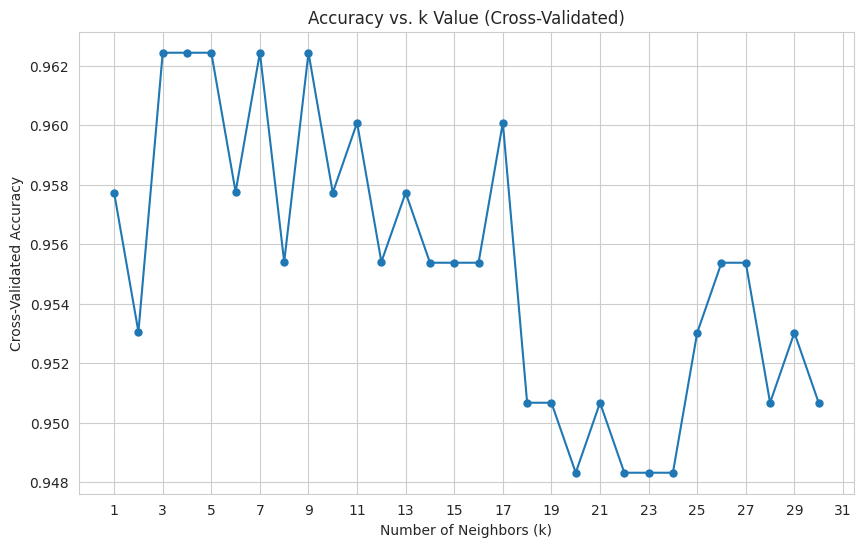

In [168]:

# 6. Comparing different values of k (pre-tuning exploration)
# This loop now runs using the original range, giving insight into how k affects performance
# You could also visualize grid_search.cv_results_ here for a more direct comparison.
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    k_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', markersize=5)
plt.title('Accuracy vs. k Value (Cross-Validated)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(np.arange(1, 32, 2)) # Ensure ticks are on odd numbers for clarity
plt.grid(True)
plt.show()

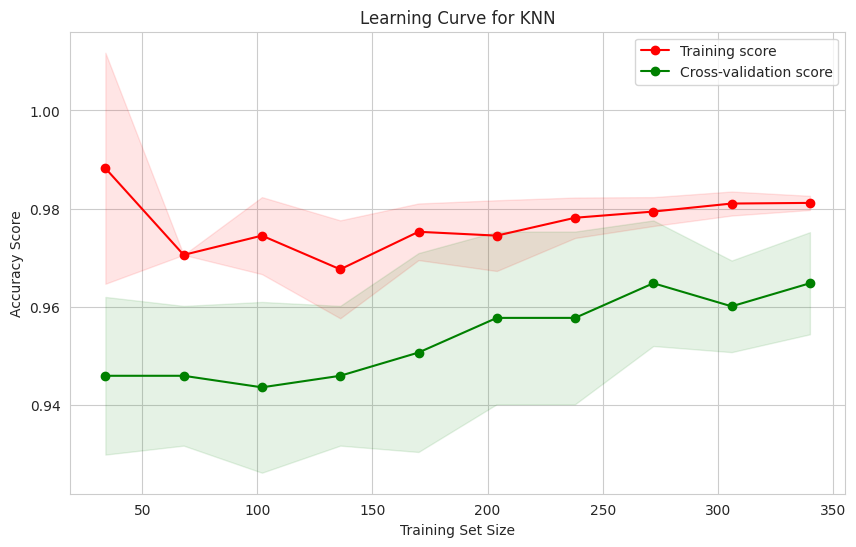

In [169]:
# 7. Learning curve to diagnose bias-variance tradeoff
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                         weights=grid_search.best_params_['weights'],
                         metric=grid_search.best_params_['metric']), # Use all best params
    X_train_scaled, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1 # Use all available CPU cores
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.title('Learning Curve for KNN')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


--- Decision Boundary Visualization ---


<Figure size 1000x800 with 0 Axes>

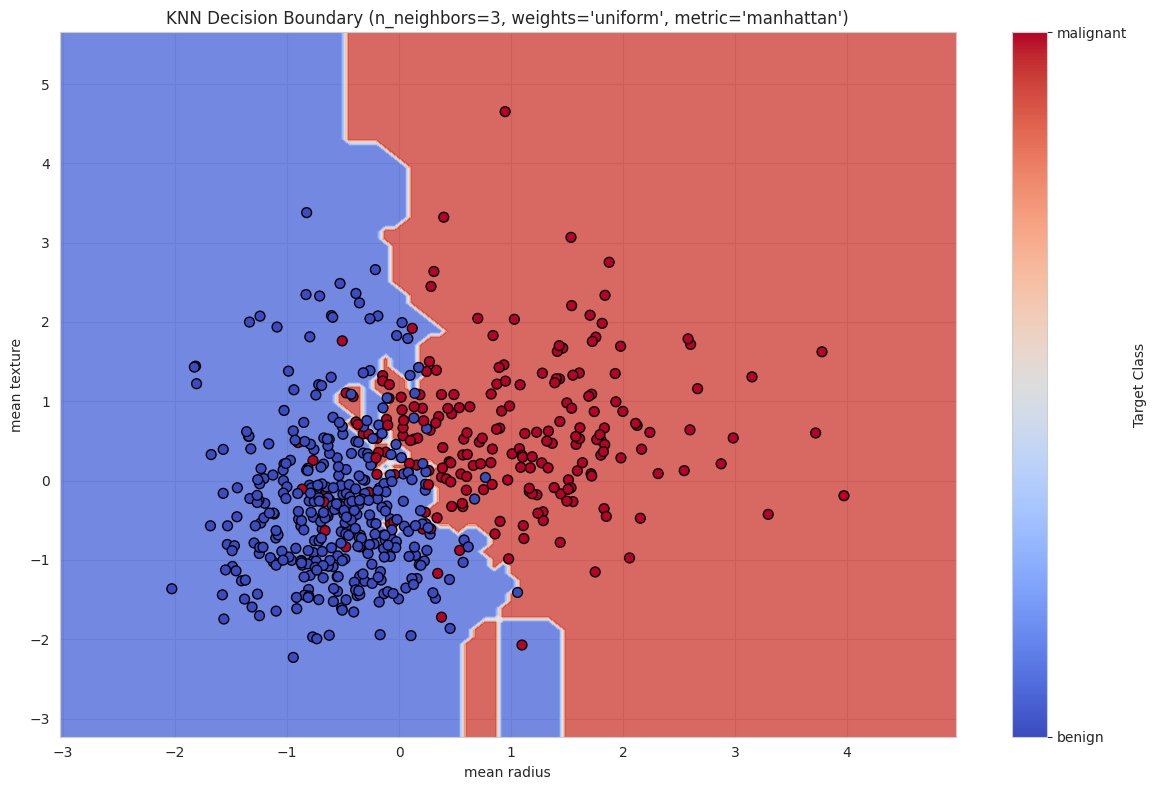


KNN implementation complete!


In [170]:
# 8. Visualizing decision boundaries (using only two features for visualization)
print("\n--- Decision Boundary Visualization ---")
# Use the best model found for visualization
final_knn_2d = KNeighborsClassifier(n_neighbors=best_knn.n_neighbors,
                                    weights=best_knn.weights,
                                    metric=best_knn.metric)

# Select only two features for visualization from the *original* dataset, then scale them.
feature_idx = [0, 1] # First two features (e.g., 'mean radius', 'mean texture')
X_2d_original = X[:, feature_idx]

# Scale these two features using the *already fitted* scaler (or a new one if preferred, but usually use the main one)
# We fit a new scaler just for these 2 features to ensure proper scaling for this specific 2D space.
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d_original)

# For visualization, we typically train on the entire 2D dataset
final_knn_2d.fit(X_2d_scaled, y_redefined) # Use the redefined target

# Plot the decision boundary
plt.figure(figsize=(10, 8))
# DecisionBoundaryDisplay requires X to be the data used for plotting,
# not necessarily X_train or X_test. Here, it's the full 2D scaled data.
disp = DecisionBoundaryDisplay.from_estimator(
    final_knn_2d,
    X_2d_scaled, # Use the full scaled 2D data for boundary plotting
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    xlabel=feature_names[feature_idx[0]],
    ylabel=feature_names[feature_idx[1]]
)

# Plot the actual data points
scatter = disp.ax_.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y_redefined, # Use redefined target for scatter
                           edgecolor='k', s=50, cmap=plt.cm.coolwarm)
plt.title(f"KNN Decision Boundary (n_neighbors={final_knn_2d.n_neighbors}, "
          f"weights='{final_knn_2d.weights}', metric='{final_knn_2d.metric}')")
cbar = plt.colorbar(scatter, label='Target Class')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(target_names_redefined)
plt.tight_layout()
plt.show()

print("\nKNN implementation complete!")